In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df=pd.read_excel("/content/drive/MyDrive/data_microbiome R.xlsx")
df.head()

,MICROBIOME_NAME,DESCRIPTION,GENUS,TCGA-IB-AAUR-01,TCGA-IB-8126-01,TCGA-3A-A9IH-01,TCGA-HZ-A8P1-01,TCGA-HZ-A49I-01,TCGA-2J-AABV-01,TCGA-HZ-8637-01,...,TCGA-HV-AA8X-01,TCGA-US-A77J-01,TCGA-2L-AAQE-01,TCGA-YH-A8SY-01,TCGA-HZ-8001-01,TCGA-RB-A7B8-01,TCGA-IB-A6UF-01,TCGA-2L-AAQI-01,TCGA-L1-A7W4-01,TCGA-2L-AAQA-01
0,Prasinovirus,k__Viruses,g__Prasinovirus,0.083074,0.154394,1.513401,0.638828,0.405265,0.727379,-0.439491,...,0.663834,0.753138,0.186437,0.497549,1.738044,0.429216,0.416821,-0.223058,0.528877,0.084856
1,Sfi1unalikevirus,k__Viruses,g__Sfi1unalikevirus,1.959147,2.030468,1.879815,2.647464,2.413901,3.035834,1.569145,...,2.396737,2.572882,2.270341,2.317293,2.161718,2.329709,2.292894,1.860846,2.554108,2.168760
2,Simplexvirus,k__Viruses,g__Simplexvirus,4.725361,3.526593,4.650853,3.513419,4.770182,2.369910,3.657492,...,3.748198,4.373791,4.333368,4.922349,3.493336,2.872168,4.559537,5.131981,3.793093,4.017662
3,Parapoxvirus,k__Viruses,g__Parapoxvirus,0.523002,0.594322,0.507717,1.274269,1.040705,1.656054,0.195949,...,1.392245,1.230939,0.928398,0.975350,0.788522,0.882765,0.856749,0.518904,1.221389,0.826818
4,Bicaudavirus,k__Viruses,g__Bicaudavirus,1.066647,1.137967,0.920746,1.694830,1.461267,2.181005,0.616511,...,1.287541,1.643968,1.341427,1.388379,1.209084,1.358993,1.400394,0.931932,1.625591,1.239846


In [ ]:
# Remove non-genetic data in the "GENUS" column
# Handle missing values before counting
df_cleaned = df.dropna(subset=['GENUS'])  # Remove rows with missing values in 'GENUS' column

# Count rows where GENUS column starts with 'o__'
count_starting_with_o = df_cleaned[df_cleaned['GENUS'].str.startswith('o__')].shape[0]

# Print the total count
print("Total number of rows where GENUS column starts with 'o__':", count_starting_with_o)

Total number of rows where GENUS column starts with 'o__': 323


In [ ]:
# Initial number of values in the 'GENUS' column
total_rows_initial = len(df)
print("Total number of rows in the original DataFrame:", total_rows_initial)

Total number of rows in the original DataFrame: 1406


In [ ]:
# Remove rows where GENUS column starts with 'o__'
df_cleaned = df[~df['GENUS'].str.startswith('o__', na=False)] # Handle NaN values

# Print number of remaining rows
remaining_rows = len(df_cleaned)
print("Number of remaining rows after removal:", remaining_rows)

Number of remaining rows after removal: 1083


In [ ]:
# Check for missing values in the 'GENUS' column of df_cleaned
missing_values_genus = df_cleaned['GENUS'].isnull().sum()

# Print the result
print("Missing values in the 'GENUS' column of the remaining DataFrame:", missing_values_genus)

Missing values in the 'GENUS' column of the remaining DataFrame: 2


In [ ]:
# Remove rows with missing values specifically in the 'GENUS' column
df_cleaned = df_cleaned.dropna(subset=['GENUS'])

# Print number of remaining rows after removing missing values from 'GENUS' column
remaining_rows = len(df_cleaned)
print("Number of remaining rows after removing missing values from 'GENUS' column:", remaining_rows)

Number of remaining rows after removing missing values from 'GENUS' column: 1081


In [ ]:
import pandas as pd

# Assuming df_cleaned is your DataFrame containing microbiome data

# Count rows where 'GENUS' does not start with 'g__'
non_gene_rows = df_cleaned[~df_cleaned['GENUS'].str.startswith('g__', na=False)]
num_non_gene_rows = non_gene_rows.shape[0]

# Remove rows where 'GENUS' does not start with 'g__'
df_cleaned_filtered = df_cleaned[df_cleaned['GENUS'].str.startswith('g__', na=False)]

# Optionally reset index if needed
df_cleaned_filtered.reset_index(drop=True, inplace=True)

# Count remaining rows
num_remaining_rows = df_cleaned_filtered.shape[0]

# Present results
print(f"Number of rows where 'GENUS' does not start with 'g__': {num_non_gene_rows}")
print(f"Number of remaining rows: {num_remaining_rows}")


Number of rows where 'GENUS' does not start with 'g__': 6
Number of remaining rows: 1075


In [ ]:
# Fully cleaned dataframe

# Display the filtered DataFrame
print("\nFiltered DataFrame:")
print(df_cleaned_filtered)


Filtered DataFrame:
          MICROBIOME_NAME  DESCRIPTION                   GENUS  \
0            Prasinovirus   k__Viruses         g__Prasinovirus   
1        Sfi1unalikevirus   k__Viruses     g__Sfi1unalikevirus   
2            Simplexvirus   k__Viruses         g__Simplexvirus   
3            Parapoxvirus   k__Viruses         g__Parapoxvirus   
4            Bicaudavirus   k__Viruses         g__Bicaudavirus   
...                   ...          ...                     ...   
1070         Geminicoccus  k__Bacteria         g__Geminicoccus   
1071        Acaryochloris  k__Bacteria        g__Acaryochloris   
1072         Geminocystis  k__Bacteria         g__Geminocystis   
1073  Chloracidobacterium  k__Bacteria  g__Chloracidobacterium   
1074        Thermobispora  k__Bacteria        g__Thermobispora   

      TCGA-IB-AAUR-01  TCGA-IB-8126-01  TCGA-3A-A9IH-01  TCGA-HZ-A8P1-01  \
0            0.083074         0.154394         1.513401         0.638828   
1            1.959147         2.03

In [ ]:
# Check for missing values (NaNs and blanks) in the entire DataFrame
missing_values = df_cleaned_filtered.isnull().sum().sum()  # Sum of all NaN values in the DataFrame

if missing_values == 0:
    print("No missing values (NaNs or blanks) found in the DataFrame.")
else:
    print(f"Total number of missing values (NaNs or blanks) in the DataFrame: {missing_values}")


No missing values (NaNs or blanks) found in the DataFrame.


In [ ]:
# Calculate the variance for each gene
import pandas as pd

# Assuming df_cleaned_filtered is your DataFrame
# Extract 'GENUS' column and separate it from the sample data
genus_column = df_cleaned_filtered['GENUS']
data = df_cleaned_filtered.drop(columns=['GENUS'])

# Convert all remaining columns to numeric, coerce errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate variance for each gene (row-wise variance)
variances = data.var(axis=1)

# Add the variances as a new column in the original DataFrame
df_cleaned_filtered['Variance'] = variances

# Print the DataFrame with the new 'Variance' column
print(df_cleaned_filtered)

          MICROBIOME_NAME  DESCRIPTION                   GENUS  \
0            Prasinovirus   k__Viruses         g__Prasinovirus   
1        Sfi1unalikevirus   k__Viruses     g__Sfi1unalikevirus   
2            Simplexvirus   k__Viruses         g__Simplexvirus   
3            Parapoxvirus   k__Viruses         g__Parapoxvirus   
4            Bicaudavirus   k__Viruses         g__Bicaudavirus   
...                   ...          ...                     ...   
1070         Geminicoccus  k__Bacteria         g__Geminicoccus   
1071        Acaryochloris  k__Bacteria        g__Acaryochloris   
1072         Geminocystis  k__Bacteria         g__Geminocystis   
1073  Chloracidobacterium  k__Bacteria  g__Chloracidobacterium   
1074        Thermobispora  k__Bacteria        g__Thermobispora   

      TCGA-IB-AAUR-01  TCGA-IB-8126-01  TCGA-3A-A9IH-01  TCGA-HZ-A8P1-01  \
0            0.083074         0.154394         1.513401         0.638828   
1            1.959147         2.030468         1.879815

<ipython-input-12-1af80865ca8b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered['Variance'] = variances


In [ ]:
#Remove the genes with variances below the 25% percentile and remove the variance column
import pandas as pd

# Assuming ddf_cleaned_filtered is your DataFrame
# Extract 'GENUS' column and separate it from the sample data
genus_column = df_cleaned_filtered['GENUS']
data = df_cleaned_filtered.drop(columns=['GENUS'])

# Convert all remaining columns to numeric, coerce errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Calculate variance for each gene (row-wise variance)
variances = data.var(axis=1)

# Add the variances as a new column in the original DataFrame
df_cleaned_filtered['Variance'] = variances

# Calculate the 25th percentile of the variance
percentile_25 = df_cleaned_filtered['Variance'].quantile(0.25)

# Filter out genes with variance below the 25th percentile
filtered_df = df_cleaned_filtered[df_cleaned_filtered['Variance'] >= percentile_25]

# Drop the 'Variance' column as it is no longer needed
filtered_df = filtered_df.drop(columns=['Variance'])

# Print the filtered DataFrame
print(filtered_df)


        MICROBIOME_NAME  DESCRIPTION                 GENUS  TCGA-IB-AAUR-01  \
0          Prasinovirus   k__Viruses       g__Prasinovirus         0.083074   
2          Simplexvirus   k__Viruses       g__Simplexvirus         4.725361   
5           Aquamavirus   k__Viruses        g__Aquamavirus         1.290608   
6            Mardivirus   k__Viruses         g__Mardivirus         5.236304   
8     Taupapillomavirus   k__Viruses  g__Taupapillomavirus         2.459973   
...                 ...          ...                   ...              ...   
1069  Candidatus_Nasuia  k__Bacteria  g__Candidatus_Nasuia         0.922382   
1070       Geminicoccus  k__Bacteria       g__Geminicoccus         1.019434   
1071      Acaryochloris  k__Bacteria      g__Acaryochloris         1.828471   
1072       Geminocystis  k__Bacteria       g__Geminocystis         1.447716   
1074      Thermobispora  k__Bacteria      g__Thermobispora         1.839358   

      TCGA-IB-8126-01  TCGA-3A-A9IH-01  TCGA-HZ-A8P

<ipython-input-13-3bf482a6dd10>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered['Variance'] = variances


In [ ]:
print("Remaining rows in the filtered DataFrame:", filtered_df.shape[0])

Remaining rows in the filtered DataFrame: 806


In [ ]:
# Now the main dataframe is called filtered_df
print(filtered_df)

        MICROBIOME_NAME  DESCRIPTION                 GENUS  TCGA-IB-AAUR-01  \
0          Prasinovirus   k__Viruses       g__Prasinovirus         0.083074   
2          Simplexvirus   k__Viruses       g__Simplexvirus         4.725361   
5           Aquamavirus   k__Viruses        g__Aquamavirus         1.290608   
6            Mardivirus   k__Viruses         g__Mardivirus         5.236304   
8     Taupapillomavirus   k__Viruses  g__Taupapillomavirus         2.459973   
...                 ...          ...                   ...              ...   
1069  Candidatus_Nasuia  k__Bacteria  g__Candidatus_Nasuia         0.922382   
1070       Geminicoccus  k__Bacteria       g__Geminicoccus         1.019434   
1071      Acaryochloris  k__Bacteria      g__Acaryochloris         1.828471   
1072       Geminocystis  k__Bacteria       g__Geminocystis         1.447716   
1074      Thermobispora  k__Bacteria      g__Thermobispora         1.839358   

      TCGA-IB-8126-01  TCGA-3A-A9IH-01  TCGA-HZ-A8P

In [ ]:
# Remove the 'MICROBIOME_NAME' and 'DESCRIPTION' columns
filtered_df = filtered_df.drop(['MICROBIOME_NAME', 'DESCRIPTION'], axis=1)

In [ ]:
print(filtered_df)

                     GENUS  TCGA-IB-AAUR-01  TCGA-IB-8126-01  TCGA-3A-A9IH-01  \
0          g__Prasinovirus         0.083074         0.154394         1.513401   
2          g__Simplexvirus         4.725361         3.526593         4.650853   
5           g__Aquamavirus         1.290608         2.946891         1.429307   
6            g__Mardivirus         5.236304         8.477549         7.700409   
8     g__Taupapillomavirus         2.459973         0.946330         0.548654   
...                    ...              ...              ...              ...   
1069  g__Candidatus_Nasuia         0.922382         2.960535         2.069228   
1070       g__Geminicoccus         1.019434         1.090754         1.018265   
1071      g__Acaryochloris         1.828471         1.899791         1.887009   
1072       g__Geminocystis         1.447716         1.519036         1.288720   
1074      g__Thermobispora         1.839358         1.910678         1.815199   

      TCGA-HZ-A8P1-01  TCGA

In [ ]:
# Round all the numbers to one decimal place
filtered_df = filtered_df.round(1)

print(filtered_df)

                     GENUS  TCGA-IB-AAUR-01  TCGA-IB-8126-01  TCGA-3A-A9IH-01  \
0          g__Prasinovirus              0.1              0.2              1.5   
2          g__Simplexvirus              4.7              3.5              4.7   
5           g__Aquamavirus              1.3              2.9              1.4   
6            g__Mardivirus              5.2              8.5              7.7   
8     g__Taupapillomavirus              2.5              0.9              0.5   
...                    ...              ...              ...              ...   
1069  g__Candidatus_Nasuia              0.9              3.0              2.1   
1070       g__Geminicoccus              1.0              1.1              1.0   
1071      g__Acaryochloris              1.8              1.9              1.9   
1072       g__Geminocystis              1.4              1.5              1.3   
1074      g__Thermobispora              1.8              1.9              1.8   

      TCGA-HZ-A8P1-01  TCGA

In [ ]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame after removing 'MICROBIOME_NAME' and 'DESCRIPTION' columns
# Replace sample column names with s1, s2, s3, etc.
sample_columns = filtered_df.columns[1:]  # Assuming 'GENUS' is the first column
# Start range from 0 to include all columns
new_column_names = ['GENUS'] + ['s' + str(i) for i in range(len(sample_columns))]
filtered_df.columns = new_column_names

# Print the updated DataFrame
print(filtered_df)

                     GENUS   s0   s1   s2   s3   s4   s5   s6   s7   s8  ...  \
0          g__Prasinovirus  0.1  0.2  1.5  0.6  0.4  0.7 -0.4 -0.3 -0.0  ...   
2          g__Simplexvirus  4.7  3.5  4.7  3.5  4.8  2.4  3.7  5.2  3.3  ...   
5           g__Aquamavirus  1.3  2.9  1.4  1.9  1.7  2.5  0.8  0.9  1.2  ...   
6            g__Mardivirus  5.2  8.5  7.7  6.9  5.1  7.8  5.0  4.9  6.8  ...   
8     g__Taupapillomavirus  2.5  0.9  0.5  1.3  1.0  1.5  1.8  0.5  0.6  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1069  g__Candidatus_Nasuia  0.9  3.0  2.1  1.8  2.5  2.4  3.3  1.0  2.0  ...   
1070       g__Geminicoccus  1.0  1.1  1.0  1.6  1.3  1.4  0.5  3.0  0.9  ...   
1071      g__Acaryochloris  1.8  1.9  1.9  2.6  3.9  2.9  1.5  1.5  1.9  ...   
1072       g__Geminocystis  1.4  1.5  1.3  2.0  3.3  2.2  3.2  1.1  1.3  ...   
1074      g__Thermobispora  1.8  1.9  1.8  2.5  2.3  2.8  1.4  1.5  1.9  ...   

      s167  s168  s169  s170  s171  s17

In [ ]:
# replace microbes with m1, m2, m3
import pandas as pd

# Assuming 'filtered_df' is your actual DataFrame with 'GENUS' column and sample columns (s1, s2, s3, etc.)

# Step 1: Create a mapping dictionary and replace 'GENUS' column
genus_mapping = {}
new_genus_names = ['m{}'.format(i+1) for i in range(len(filtered_df['GENUS'].unique()))]
for i, genus in enumerate(filtered_df['GENUS'].unique()):
    genus_mapping[genus] = new_genus_names[i]

# Replace 'GENUS' column using the mapping
filtered_df['GENUS'] = filtered_df['GENUS'].replace(genus_mapping)

# Step 2: Print the mapping for future analysis
print("\nMapping of original microbe names to m-names:")
print(genus_mapping)

# Print the updated DataFrame to check
print("\nUpdated DataFrame:")
print(filtered_df)



Mapping of original microbe names to m-names:
{'g__Prasinovirus': 'm1', 'g__Simplexvirus': 'm2', 'g__Aquamavirus': 'm3', 'g__Mardivirus': 'm4', 'g__Taupapillomavirus': 'm5', 'g__I3likevirus': 'm6', 'g__Furovirus': 'm7', 'g__Proboscivirus': 'm8', 'g__Gammacoronavirus': 'm9', 'g__Spo1virus': 'm10', 'g__Sicinivirus': 'm11', 'g__Dicipivirus': 'm12', 'g__Molluscipoxvirus': 'm13', 'g__Tymovirus': 'm14', 'g__Hepacivirus': 'm15', 'g__Gammatorquevirus': 'm16', 'g__Piscihepevirus': 'm17', 'g__Pomovirus': 'm18', 'g__Ichnovirus': 'm19', 'g__Alphavirus': 'm20', 'g__Sclerodarnavirus': 'm21', 'g__Alpharetrovirus': 'm22', 'g__Capripoxvirus': 'm23', 'g__Higrevirus': 'm24', 'g__Bafinivirus': 'm25', 'g__Omegapapillomavirus': 'm26', 'g__Chlorovirus': 'm27', 'g__Hypovirus': 'm28', 'g__Aparavirus': 'm29', 'g__Hepatovirus': 'm30', 'g__Tobamovirus': 'm31', 'g__Arenavirus': 'm32', 'g__Spounalikevirus': 'm33', 'g__Betapartitivirus': 'm34', 'g__Carlavirus': 'm35', 'g__Alphacoronavirus': 'm36', 'g__Bromovirus': 

In [ ]:
import pandas as pd

# Assuming 'filtered_df' is your current DataFrame
# Transpose the DataFrame to flip samples as rows and microbes (GENUS) as columns
flipped_df = filtered_df.set_index('GENUS').T.reset_index()

# Rename the 'index' column to 'Sample' and reset the index
flipped_df = flipped_df.rename(columns={'index': 'Sample'}).reset_index(drop=True)

# Display the flipped DataFrame
print(flipped_df)


GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m795  m796  \
0         s0  0.1  4.7  1.3  5.2  2.5 -1.5  3.1  6.9  1.3  ...   0.1   3.0   
1         s1  0.2  3.5  2.9  8.5  0.9 -1.4  3.6  3.8  2.9  ...   1.7   1.5   
2         s2  1.5  4.7  1.4  7.7  0.5 -0.3  1.9  6.0  1.2  ...   0.0   1.4   
3         s3  0.6  3.5  1.9  6.9  1.3 -0.7  2.5  4.9  1.5  ...   0.6   2.1   
4         s4  0.4  4.8  1.7  5.1  1.0 -0.9  3.4  5.4  1.2  ...   0.3   1.8   
..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
172     s172  0.4  2.9  1.4  3.1  1.9 -1.3  3.1  6.0  0.8  ...   0.5   3.7   
173     s173  0.4  4.6  1.6  6.8  1.2 -1.1  4.1  7.7  3.2  ...   0.4   1.8   
174     s174 -0.2  5.1  1.0  6.9  1.1  0.4  3.1  6.5  2.9  ...  -0.2   1.4   
175     s175  0.5  3.8  3.4  6.1  1.1 -1.2  3.2  6.0  3.8  ...   0.5   2.0   
176     s176  0.1  4.0  2.9  5.9  1.4 -2.1  3.4  5.5  3.9  ...   1.7   1.7   

GENUS  m797  m798  m799  m800  m801  m802  m803  m804  
0      

In [ ]:
# Assuming 'flipped_df' is your DataFrame
print(flipped_df.columns)


Index(['Sample', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm795', 'm796', 'm797', 'm798', 'm799', 'm800', 'm801', 'm802', 'm803',
       'm804'],
      dtype='object', name='GENUS', length=807)


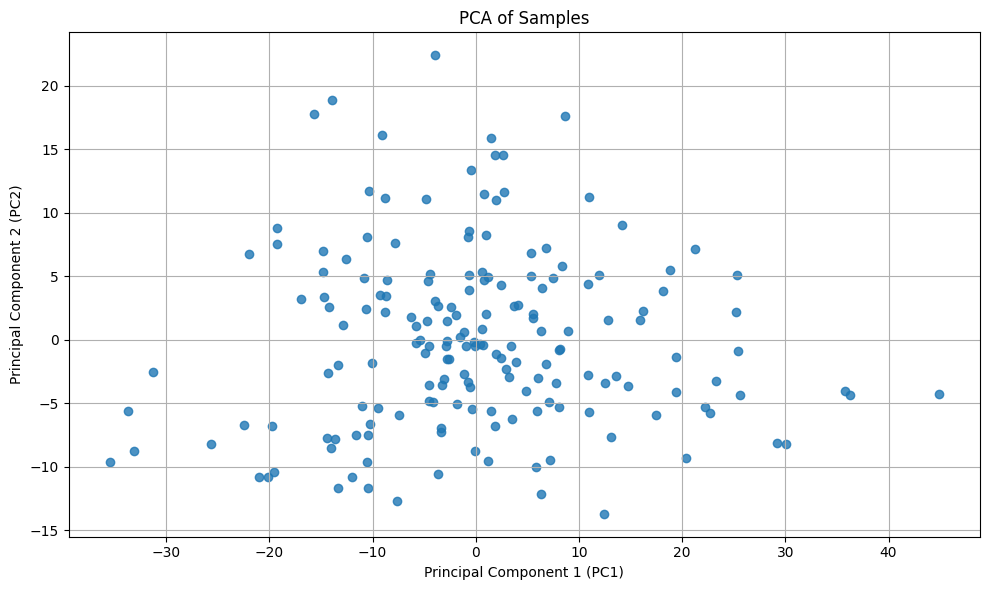

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract the samples and microbial genera columns
samples = flipped_df['Sample']  # Assuming 'Sample' is already a column
microbial_genera = flipped_df.drop(columns=['Sample'])  # Drop 'Sample' column for PCA

# Standardize the data
scaler = StandardScaler()
samples_scaled = scaler.fit_transform(microbial_genera)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(samples_scaled)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=samples)

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.8)
plt.title('PCA of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.tight_layout()
plt.show()


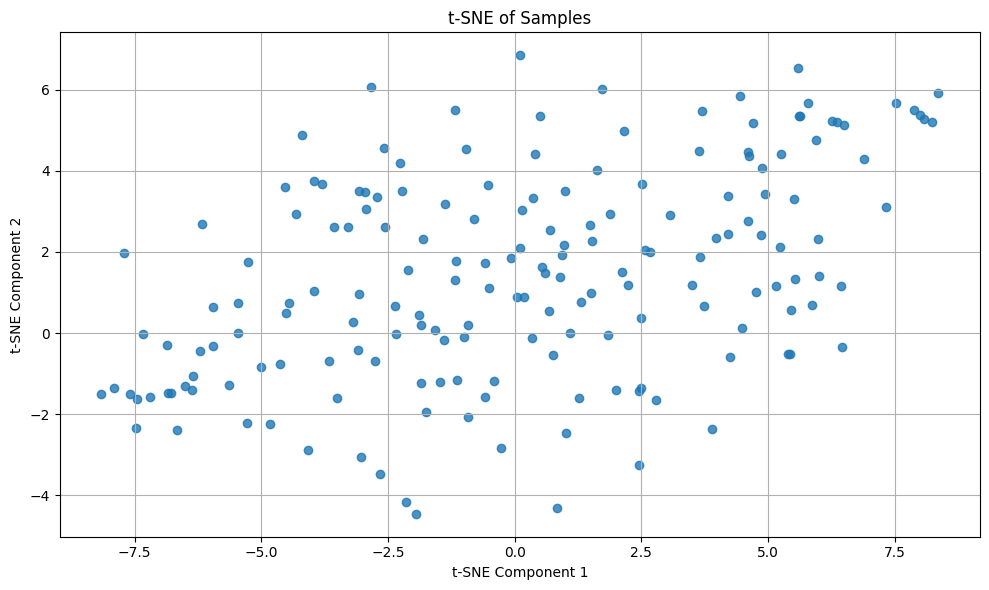

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Extract the samples and microbial genera columns
samples = flipped_df['Sample']  # Assuming 'Sample' is already a column
microbial_genera = flipped_df.drop(columns=['Sample'])  # Drop 'Sample' column for t-SNE

# Standardize the data
scaler = StandardScaler()
samples_scaled = scaler.fit_transform(microbial_genera)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Specify the number of components and random state
tsne_components = tsne.fit_transform(samples_scaled)

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['tSNE1', 'tSNE2'], index=samples)

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], alpha=0.8)
plt.title('t-SNE of Samples')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-bio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp310-cp310-linux_x86_64.whl size=3971929 sha256=118eae27e2bd9c2f20b0186ecbb8ee4deb1c1d292251554a289b24881fdcf71e
  Stored in directory: /root/.cache/pip/wheels/f3/9c/ed/c2b94011fd3765a19330df93f81265e178098dd86c047c1566
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=12158971 sha256=171e7d652f771bbe4a57d2f5efeb6abe06028f981bd7e2d209b84e1ca3ca61a0
  Stored in directory: /root/.cache/pip/wheels/8e/a9/f9/197fd5a0e5bbab5f2e03c89194f6c194bed7af5d7a8c8759f3
Successful

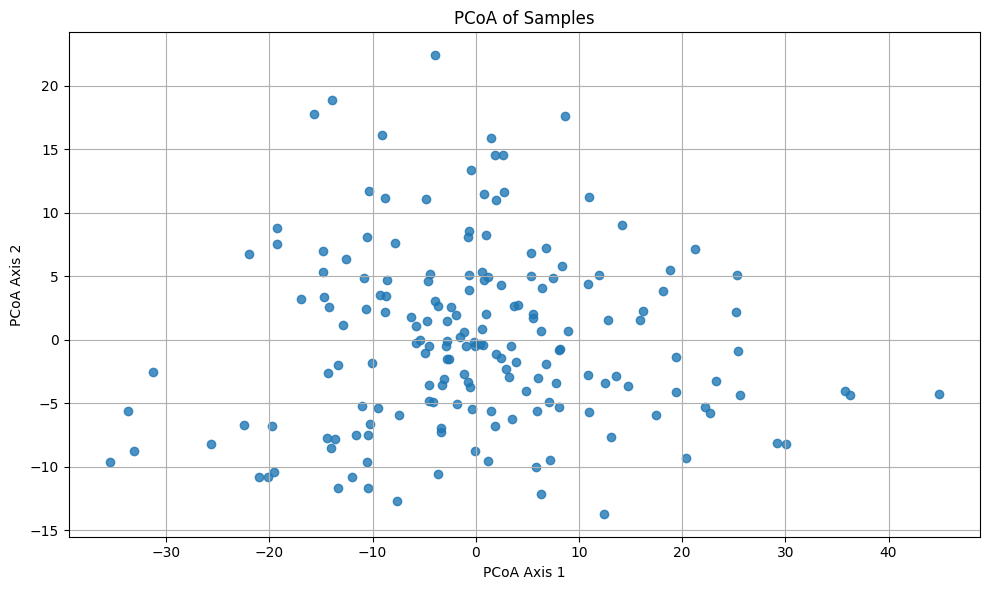

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skbio.stats.ordination import pcoa
from skbio import DistanceMatrix
from scipy.spatial.distance import euclidean

# Extract microbial genera data and samples
samples = flipped_df['Sample']
microbial_genera = flipped_df.drop(columns=['Sample'])

# Standardize the data
scaler = StandardScaler()
microbial_genera_scaled = scaler.fit_transform(microbial_genera)

# Compute pairwise distances
num_samples = microbial_genera_scaled.shape[0]
distance_matrix = [[euclidean(microbial_genera_scaled[i], microbial_genera_scaled[j]) for j in range(num_samples)] for i in range(num_samples)]
distance_matrix = DistanceMatrix(distance_matrix, ids=samples)

# Perform PCoA
pcoa_results = pcoa(distance_matrix)

# Plot PCoA results
plt.figure(figsize=(10, 6))
plt.scatter(pcoa_results.samples['PC1'], pcoa_results.samples['PC2'], alpha=0.8)
plt.title('PCoA of Samples')
plt.xlabel('PCoA Axis 1')
plt.ylabel('PCoA Axis 2')
plt.grid(True)
plt.tight_layout()
plt.show()


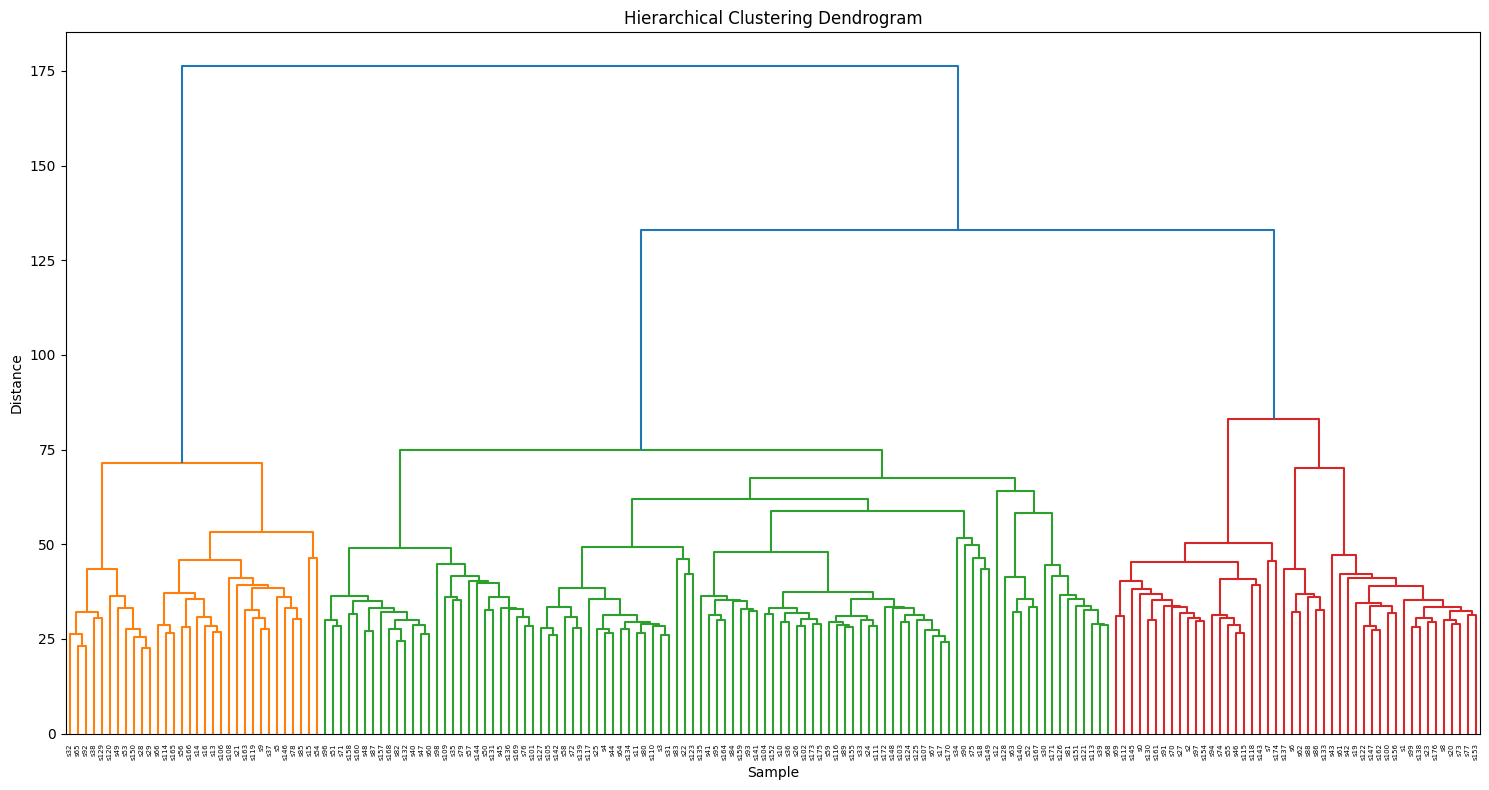

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Extract microbial genera data and samples
samples = flipped_df['Sample']
microbial_genera = flipped_df.drop(columns=['Sample'])

# Standardize the data
scaler = StandardScaler()
microbial_genera_scaled = scaler.fit_transform(microbial_genera)

# Perform hierarchical clustering
linkage_matrix = linkage(microbial_genera_scaled, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=samples.values, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define the distance threshold
distance_threshold = 150 # Adjust this based on your dendrogram

# Get cluster labels
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Add cluster labels to your dataframe
flipped_df['Cluster'] = clusters

# Print cluster sizes
print(flipped_df['Cluster'].value_counts())


Cluster
2    145
1     32
Name: count, dtype: int64


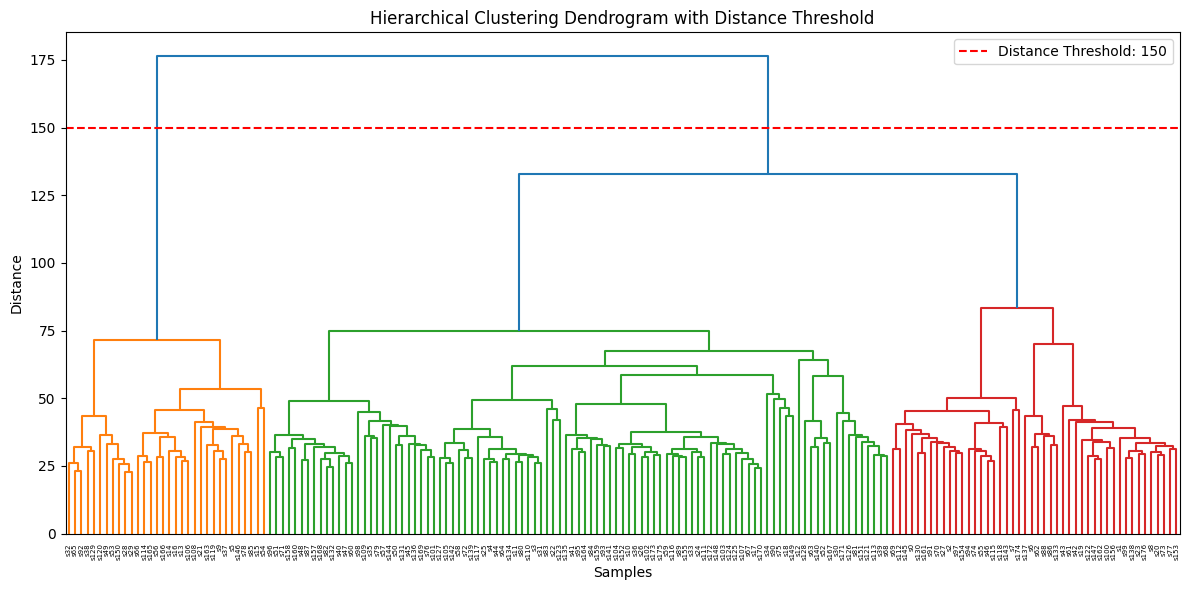

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'samples_scaled' is your standardized data
Z = linkage(samples_scaled, method='ward')  # Perform hierarchical clustering

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=samples.values, orientation='top')

# Add a horizontal line at the distance threshold
distance_threshold = 150  # Adjust this threshold based on your needs
plt.axhline(y=distance_threshold, color='r', linestyle='--', label=f'Distance Threshold: {distance_threshold}')

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with Distance Threshold')
plt.legend()

plt.tight_layout()
plt.show()


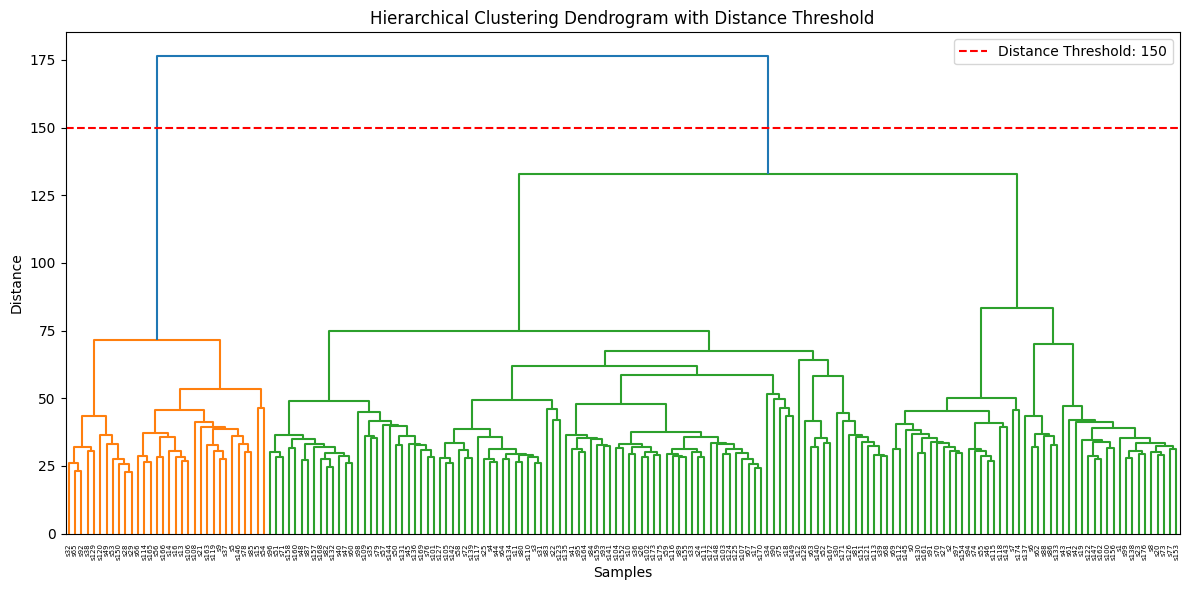

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'samples_scaled' is your standardized data
Z = linkage(samples_scaled, method='ward')  # Perform hierarchical clustering

# Define the distance threshold
distance_threshold = 150  # Adjust this threshold based on your needs

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=samples.values,
    orientation='top',
    color_threshold=distance_threshold  # Set color threshold to control colors
)

# Add a horizontal line at the distance threshold
plt.axhline(y=distance_threshold, color='r', linestyle='--', label=f'Distance Threshold: {distance_threshold}')

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with Distance Threshold')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(flipped_df.columns)

Index(['Sample', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm796', 'm797', 'm798', 'm799', 'm800', 'm801', 'm802', 'm803', 'm804',
       'Cluster'],
      dtype='object', name='GENUS', length=808)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

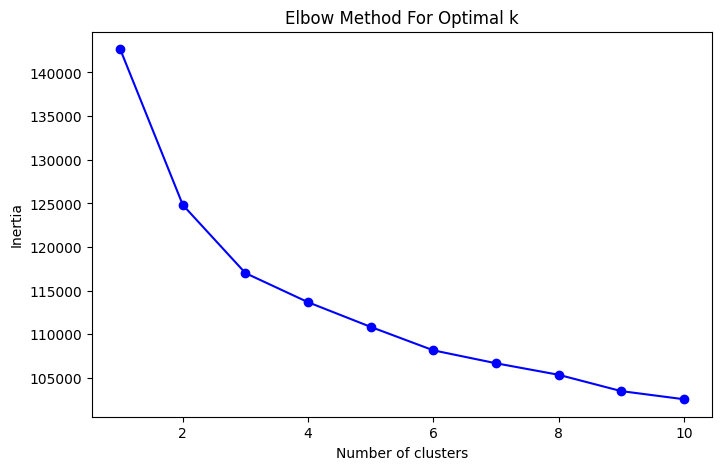

In [ ]:
#K means clustering
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming flipped_df is your DataFrame
# Drop the 'Sample' and 'Cluster' columns as they are non-numeric
numeric_columns = flipped_df.drop(columns=['Sample', 'Cluster'])

# Check and handle non-numeric values in numeric columns if any
numeric_columns = numeric_columns.apply(pd.to_numeric, errors='coerce').dropna()

# Normalize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the number of clusters, for example, based on the Elbow plot
optimal_k = 3  # Replace with the optimal number of clusters determined from the Elbow plot

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

The optimal number of clusters is: 2


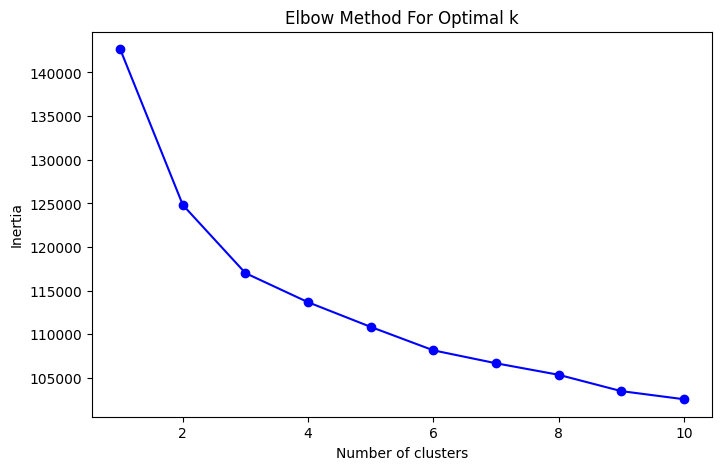

In [ ]:
# Check the optimal number of clusters
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming flipped_df is your DataFrame
# Drop the 'Sample' and 'Cluster' columns as they are non-numeric
numeric_columns = flipped_df.drop(columns=['Sample', 'Cluster'])

# Check and handle non-numeric values in numeric columns if any
numeric_columns = numeric_columns.apply(pd.to_numeric, errors='coerce').dropna()

# Normalize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the second derivative of the inertia curve
inertia = np.array(inertia)
first_derivative = np.diff(inertia)
second_derivative = np.diff(first_derivative)

# Find the optimal number of clusters based on the second derivative
optimal_k = np.argmax(second_derivative) + 2  # +2 because we lose two points due to differentiation

print(f"The optimal number of clusters is: {optimal_k}")

# Optionally, plot the Elbow curve for visualization
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

The optimal number of clusters is: 2


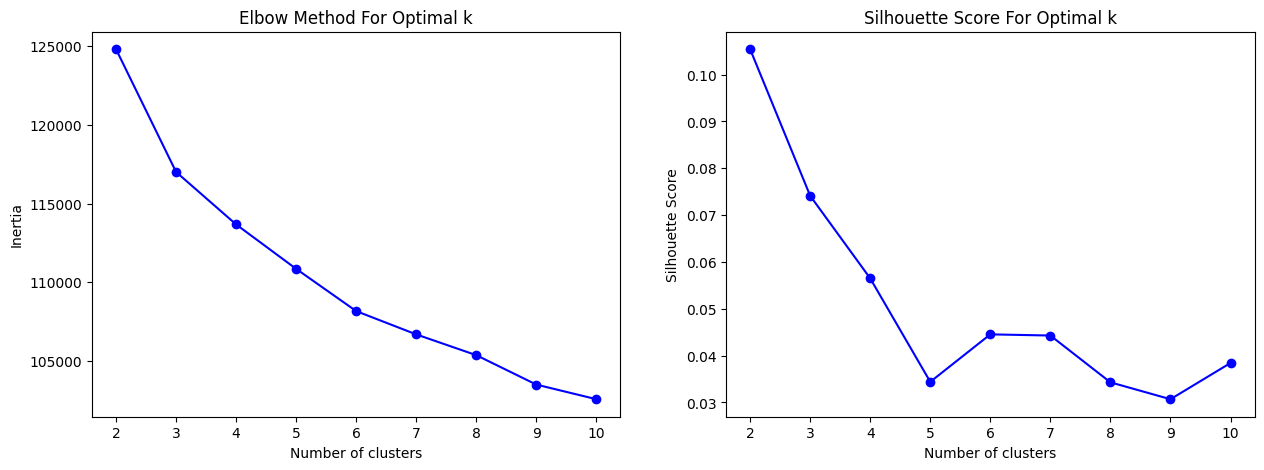

GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m796  m797  \
0         s0  0.1  4.7  1.3  5.2  2.5 -1.5  3.1  6.9  1.3  ...   3.0   1.8   
1         s1  0.2  3.5  2.9  8.5  0.9 -1.4  3.6  3.8  2.9  ...   1.5   1.8   
2         s2  1.5  4.7  1.4  7.7  0.5 -0.3  1.9  6.0  1.2  ...   1.4   1.6   
3         s3  0.6  3.5  1.9  6.9  1.3 -0.7  2.5  4.9  1.5  ...   2.1   2.4   
4         s4  0.4  4.8  1.7  5.1  1.0 -0.9  3.4  5.4  1.2  ...   1.8   2.2   
..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
172     s172  0.4  2.9  1.4  3.1  1.9 -1.3  3.1  6.0  0.8  ...   3.7   2.1   
173     s173  0.4  4.6  1.6  6.8  1.2 -1.1  4.1  7.7  3.2  ...   1.8   2.1   
174     s174 -0.2  5.1  1.0  6.9  1.1  0.4  3.1  6.5  2.9  ...   1.4   1.7   
175     s175  0.5  3.8  3.4  6.1  1.1 -1.2  3.2  6.0  3.8  ...   2.0   2.4   
176     s176  0.1  4.0  2.9  5.9  1.4 -2.1  3.4  5.5  3.9  ...   1.7   2.0   

GENUS  m798  m799  m800  m801  m802  m803  m804  Cluster  
0   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Silhouette Score/ put each sample in its cluster
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming flipped_df is your DataFrame
# Drop the 'Sample' and 'Cluster' columns as they are non-numeric
numeric_columns = flipped_df.drop(columns=['Sample', 'Cluster'])

# Check and handle non-numeric values in numeric columns if any
numeric_columns = numeric_columns.apply(pd.to_numeric, errors='coerce').dropna()

# Normalize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Start from 2 as silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Find the optimal number of clusters based on the silhouette scores
optimal_k = K[np.argmax(silhouette_scores)]

print(f"The optimal number of clusters is: {optimal_k}")

# Optionally, plot the Elbow curve and silhouette scores for visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.show()

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
flipped_df.loc[numeric_columns.index, 'Cluster'] = clusters

# Print the DataFrame with the cluster labels
print(flipped_df)

# Optionally, analyze the clusters
print(flipped_df['Cluster'].value_counts())


In [ ]:
cluster_counts = flipped_df['Cluster'].value_counts()
print(cluster_counts)


Cluster
0    122
1     55
Name: count, dtype: int64


In [ ]:
!pip install scikit-bio pandas


In [ ]:
# Prepare the data for diversity
import pandas as pd

# Filter data for Cluster 0
cluster_0_microbes = flipped_df[flipped_df['Cluster'] == 0].copy()

# Filter data for Cluster 1
cluster_1_microbes = flipped_df[flipped_df['Cluster'] == 1].copy()

# Select only numeric columns for checking and updating negative values
numeric_columns_0 = cluster_0_microbes.select_dtypes(include=['number'])
numeric_columns_1 = cluster_1_microbes.select_dtypes(include=['number'])

# Set negative values to zero in numeric columns of cluster_0_microbes
for col in numeric_columns_0.columns:
    cluster_0_microbes[col] = numeric_columns_0[col].apply(lambda x: max(x, 0) if isinstance(x, (int, float)) else x)

# Set negative values to zero in numeric columns of cluster_1_microbes
for col in numeric_columns_1.columns:
    cluster_1_microbes[col] = numeric_columns_1[col].apply(lambda x: max(x, 0) if isinstance(x, (int, float)) else x)

# Verify that no negative values remain
negative_values_0_after = cluster_0_microbes[numeric_columns_0.columns][cluster_0_microbes[numeric_columns_0.columns] < 0].stack()
print("Negative values in Cluster 0 after setting to zero:\n", negative_values_0_after)

negative_values_1_after = cluster_1_microbes[numeric_columns_1.columns][cluster_1_microbes[numeric_columns_1.columns] < 0].stack()
print("Negative values in Cluster 1 after setting to zero:\n", negative_values_1_after)

Negative values in Cluster 0 after setting to zero:
 Series([], dtype: float64)
Negative values in Cluster 1 after setting to zero:
 Series([], dtype: float64)


In [ ]:
import pandas as pd
from skbio.diversity.alpha import shannon, simpson

# Verify column names
print(flipped_df.columns)

# Separate the clusters
cluster_0 = flipped_df[flipped_df['Cluster'] == 0].copy()
cluster_1 = flipped_df[flipped_df['Cluster'] == 1].copy()

# Drop non-microbial columns
columns_to_drop = ['Sample', 'Cluster']
cluster_0_microbes = cluster_0.drop(columns=columns_to_drop)
cluster_1_microbes = cluster_1.drop(columns=columns_to_drop)

# Convert all values to numeric, setting errors='coerce' will convert non-numeric values to NaN
cluster_0_microbes = cluster_0_microbes.apply(pd.to_numeric, errors='coerce')
cluster_1_microbes = cluster_1_microbes.apply(pd.to_numeric, errors='coerce')

# Set NaN values to zero
cluster_0_microbes = cluster_0_microbes.fillna(0)
cluster_1_microbes = cluster_1_microbes.fillna(0)

# Ensure no negative values remain
cluster_0_microbes = cluster_0_microbes.applymap(lambda x: max(x, 0))
cluster_1_microbes = cluster_1_microbes.applymap(lambda x: max(x, 0))

# Calculate Shannon diversity for each sample in Cluster 0
cluster_0['Shannon'] = cluster_0_microbes.apply(shannon, axis=1)

# Calculate Simpson diversity for each sample in Cluster 0
cluster_0['Simpson'] = cluster_0_microbes.apply(simpson, axis=1)

# Calculate Shannon diversity for each sample in Cluster 1
cluster_1['Shannon'] = cluster_1_microbes.apply(shannon, axis=1)

# Calculate Simpson diversity for each sample in Cluster 1
cluster_1['Simpson'] = cluster_1_microbes.apply(simpson, axis=1)

# Display the first few rows to check the results
print("Cluster 0 diversity:\n", cluster_0[['Shannon', 'Simpson']].head())
print("Cluster 1 diversity:\n", cluster_1[['Shannon', 'Simpson']].head())


Index(['Sample', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm796', 'm797', 'm798', 'm799', 'm800', 'm801', 'm802', 'm803', 'm804',
       'Cluster'],
      dtype='object', name='GENUS', length=808)


<ipython-input-130-3f37a33c2d91>:25: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-130-3f37a33c2d91>:26: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Cluster 0 diversity:
 GENUS   Shannon   Simpson
0      6.250050  0.997417
1      6.256837  0.997440
2      6.223449  0.997307
4      6.293183  0.997532
6      6.137621  0.997042
Cluster 1 diversity:
 GENUS   Shannon   Simpson
3      6.337161  0.997665
5      6.396683  0.997889
9      6.344023  0.997650
10     6.323079  0.997597
11     6.334220  0.997657


In [ ]:
# Alpha diversity
import pandas as pd
from skbio.diversity.alpha import shannon, simpson

# Load your DataFrame
# flipped_df = pd.read_csv('path_to_your_file.csv')

# Verify column names
print(flipped_df.columns)

# Separate the clusters
cluster_0 = flipped_df[flipped_df['Cluster'] == 0]
cluster_1 = flipped_df[flipped_df['Cluster'] == 1]

# Drop non-microbial columns
columns_to_drop = ['Sample', 'Cluster']
cluster_0_microbes = cluster_0.drop(columns=columns_to_drop)
cluster_1_microbes = cluster_1.drop(columns=columns_to_drop)

# Check for negative values
negative_values_0 = cluster_0_microbes[cluster_0_microbes < 0].stack()
negative_values_1 = cluster_1_microbes[cluster_1_microbes < 0].stack()
print("Negative values in Cluster 0:\n", negative_values_0)
print("Negative values in Cluster 1:\n", negative_values_1)

# Set negative values to zero
cluster_0_microbes = cluster_0_microbes.applymap(lambda x: max(x, 0))
cluster_1_microbes = cluster_1_microbes.applymap(lambda x: max(x, 0))

# Calculate Shannon diversity for each sample
cluster_0['Shannon'] = cluster_0_microbes.apply(shannon, axis=1)
cluster_1['Shannon'] = cluster_1_microbes.apply(shannon, axis=1)

# Calculate Simpson diversity for each sample
cluster_0['Simpson'] = cluster_0_microbes.apply(simpson, axis=1)
cluster_1['Simpson'] = cluster_1_microbes.apply(simpson, axis=1)

# Display the first few rows to check the results
cluster_0.head(), cluster_1.head()


Index(['Sample', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm796', 'm797', 'm798', 'm799', 'm800', 'm801', 'm802', 'm803', 'm804',
       'Cluster'],
      dtype='object', name='GENUS', length=808)
Negative values in Cluster 0:
      GENUS
0    m6      -1.5
     m16     -1.6
     m23     -0.9
     m25     -0.1
     m31     -0.5
             ... 
176  m736    -0.8
     m741    -3.3
     m751    -1.0
     m769    -2.1
     m787    -0.5
Length: 7688, dtype: float64
Negative values in Cluster 1:
      GENUS
3    m6      -0.7
     m14     -0.1
     m16     -0.8
     m23     -0.2
     m53     -0.6
             ... 
168  m741    -2.1
     m751    -1.2
     m769    -1.0
     m787    -0.4
     m793    -0.7
Length: 1758, dtype: float64


<ipython-input-131-c0c5f1d19355>:27: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-131-c0c5f1d19355>:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-131-c0c5f1d19355>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-c0c5f1d19355>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-c0c5f1d19355>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of 

(GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m798  m799  \
 0         s0  0.1  4.7  1.3  5.2  2.5 -1.5  3.1  6.9  1.3  ...   1.9   4.2   
 1         s1  0.2  3.5  2.9  8.5  0.9 -1.4  3.6  3.8  2.9  ...   1.9   0.8   
 2         s2  1.5  4.7  1.4  7.7  0.5 -0.3  1.9  6.0  1.2  ...   1.7   0.7   
 4         s4  0.4  4.8  1.7  5.1  1.0 -0.9  3.4  5.4  1.2  ...   2.3   1.2   
 6         s6 -0.4  3.7  0.8  5.0  1.8 -1.8  3.5  6.3  3.8  ...   1.4   0.4   
 
 GENUS  m800  m801  m802  m803  m804  Cluster   Shannon   Simpson  
 0       0.9   1.0   1.8   1.4   1.8        0  6.250050  0.997417  
 1       3.0   1.1   1.9   1.5   1.9        0  6.256837  0.997440  
 2       2.1   1.0   1.9   1.3   1.8        0  6.223449  0.997307  
 4       2.5   1.3   3.9   3.3   2.3        0  6.293183  0.997532  
 6       3.3   0.5   1.5   3.2   1.4        0  6.137621  0.997042  
 
 [5 rows x 810 columns],
 GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m798  m799  \
 3        

In [ ]:
# Alpha diversity
import pandas as pd
from skbio.diversity.alpha import shannon, simpson

# Load your DataFrame
# flipped_df = pd.read_csv('path_to_your_file.csv')

# Verify column names
print(flipped_df.columns)

# Separate the clusters
cluster_0 = flipped_df[flipped_df['Cluster'] == 0]
cluster_1 = flipped_df[flipped_df['Cluster'] == 1]

# Drop non-microbial columns
columns_to_drop = ['Sample', 'Cluster']
cluster_0_microbes = cluster_0.drop(columns=columns_to_drop)
cluster_1_microbes = cluster_1.drop(columns=columns_to_drop)

# Check for negative values
negative_values_0 = cluster_0_microbes[cluster_0_microbes < 0].stack()
negative_values_1 = cluster_1_microbes[cluster_1_microbes < 0].stack()
print("Negative values in Cluster 0:\n", negative_values_0)
print("Negative values in Cluster 1:\n", negative_values_1)

# Set negative values to zero
cluster_0_microbes = cluster_0_microbes.applymap(lambda x: max(x, 0))
cluster_1_microbes = cluster_1_microbes.applymap(lambda x: max(x, 0))

# Calculate Shannon diversity for each sample
cluster_0['Shannon'] = cluster_0_microbes.apply(shannon, axis=1)
cluster_1['Shannon'] = cluster_1_microbes.apply(shannon, axis=1)

# Calculate Simpson diversity for each sample
cluster_0['Simpson'] = cluster_0_microbes.apply(simpson, axis=1)
cluster_1['Simpson'] = cluster_1_microbes.apply(simpson, axis=1)

# Display the first few rows to check the results
cluster_0.head(), cluster_1.head()



Index(['Sample', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm796', 'm797', 'm798', 'm799', 'm800', 'm801', 'm802', 'm803', 'm804',
       'Cluster'],
      dtype='object', name='GENUS', length=808)
Negative values in Cluster 0:
      GENUS
0    m6      -1.5
     m16     -1.6
     m23     -0.9
     m25     -0.1
     m31     -0.5
             ... 
176  m736    -0.8
     m741    -3.3
     m751    -1.0
     m769    -2.1
     m787    -0.5
Length: 7688, dtype: float64
Negative values in Cluster 1:
      GENUS
3    m6      -0.7
     m14     -0.1
     m16     -0.8
     m23     -0.2
     m53     -0.6
             ... 
168  m741    -2.1
     m751    -1.2
     m769    -1.0
     m787    -0.4
     m793    -0.7
Length: 1758, dtype: float64


<ipython-input-132-637ecab34174>:27: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-132-637ecab34174>:28: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-132-637ecab34174>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-637ecab34174>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-637ecab34174>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of 

(GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m798  m799  \
 0         s0  0.1  4.7  1.3  5.2  2.5 -1.5  3.1  6.9  1.3  ...   1.9   4.2   
 1         s1  0.2  3.5  2.9  8.5  0.9 -1.4  3.6  3.8  2.9  ...   1.9   0.8   
 2         s2  1.5  4.7  1.4  7.7  0.5 -0.3  1.9  6.0  1.2  ...   1.7   0.7   
 4         s4  0.4  4.8  1.7  5.1  1.0 -0.9  3.4  5.4  1.2  ...   2.3   1.2   
 6         s6 -0.4  3.7  0.8  5.0  1.8 -1.8  3.5  6.3  3.8  ...   1.4   0.4   
 
 GENUS  m800  m801  m802  m803  m804  Cluster   Shannon   Simpson  
 0       0.9   1.0   1.8   1.4   1.8        0  6.250050  0.997417  
 1       3.0   1.1   1.9   1.5   1.9        0  6.256837  0.997440  
 2       2.1   1.0   1.9   1.3   1.8        0  6.223449  0.997307  
 4       2.5   1.3   3.9   3.3   2.3        0  6.293183  0.997532  
 6       3.3   0.5   1.5   3.2   1.4        0  6.137621  0.997042  
 
 [5 rows x 810 columns],
 GENUS Sample   m1   m2   m3   m4   m5   m6   m7   m8   m9  ...  m798  m799  \
 3        

/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.009193456299765887 and the largest is 0.39731050396719253.



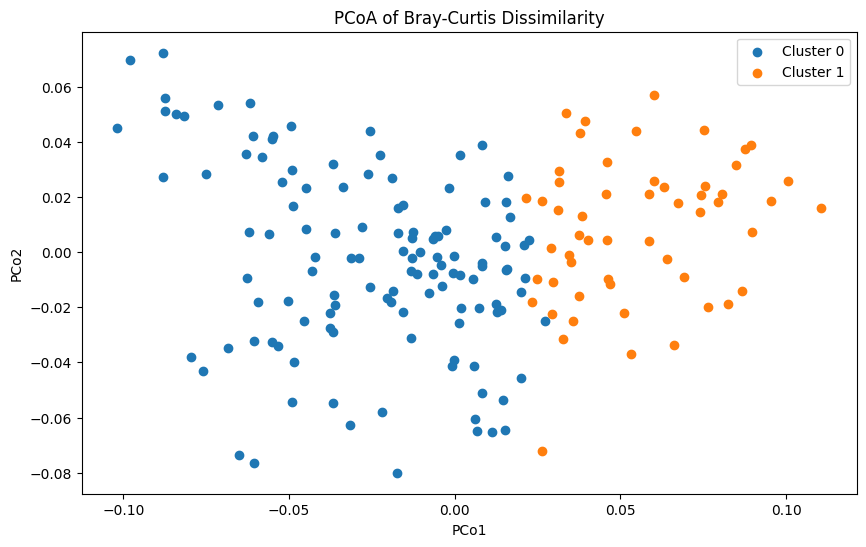

In [ ]:
# Beta diversity
# Install scikit-bio if not already installed
!pip install scikit-bio

import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import numpy as np
import matplotlib.pyplot as plt

# Combine clusters for beta diversity calculation
combined_microbes = pd.concat([cluster_0_microbes, cluster_1_microbes])

# Calculate Bray-Curtis dissimilarity
bray_curtis_matrix = beta_diversity('braycurtis', combined_microbes, ids=combined_microbes.index)

# Perform PCoA on the dissimilarity matrix
pcoa_results = pcoa(bray_curtis_matrix)

# Extract coordinates for the first two principal coordinates
pcoa_coords = pcoa_results.samples.iloc[:, :2]

# Create labels for clusters
labels = ['Cluster 0'] * len(cluster_0_microbes) + ['Cluster 1'] * len(cluster_1_microbes)

# Plot PCoA results
plt.figure(figsize=(10, 6))
for label in set(labels):
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(pcoa_coords.iloc[idx, 0], pcoa_coords.iloc[idx, 1], label=label)

plt.xlabel('PCo1')
plt.ylabel('PCo2')
plt.title('PCoA of Bray-Curtis Dissimilarity')
plt.legend()
plt.show()


     Cluster  Mean_Shannon  Std_Shannon  Mean_Simpson  Std_Simpson
0  Cluster 0      6.260400     0.056657      0.997437     0.000183
1  Cluster 1      6.372997     0.039591      0.997794     0.000125


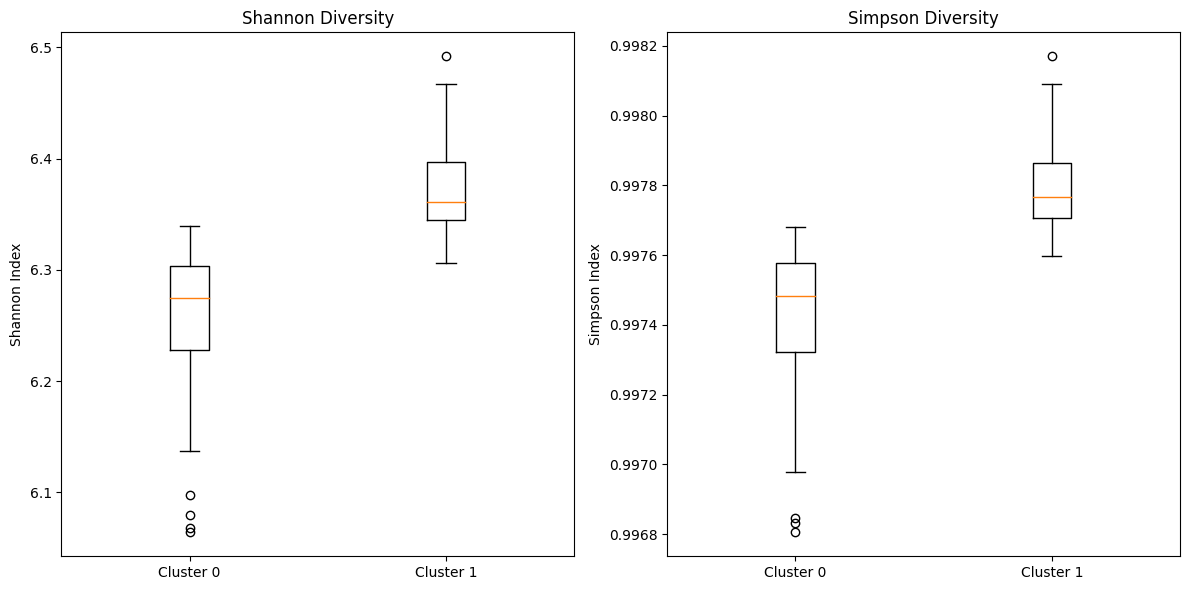

In [ ]:
# alpha diversity
# Summarize alpha diversity metrics
alpha_summary = {
    'Cluster': ['Cluster 0', 'Cluster 1'],
    'Mean_Shannon': [cluster_0['Shannon'].mean(), cluster_1['Shannon'].mean()],
    'Std_Shannon': [cluster_0['Shannon'].std(), cluster_1['Shannon'].std()],
    'Mean_Simpson': [cluster_0['Simpson'].mean(), cluster_1['Simpson'].mean()],
    'Std_Simpson': [cluster_0['Simpson'].std(), cluster_1['Simpson'].std()]
}

alpha_df = pd.DataFrame(alpha_summary)
print(alpha_df)

# Visualize alpha diversity metrics
plt.figure(figsize=(12, 6))

# Plot Shannon diversity
plt.subplot(1, 2, 1)
plt.boxplot([cluster_0['Shannon'], cluster_1['Shannon']], labels=['Cluster 0', 'Cluster 1'])
plt.title('Shannon Diversity')
plt.ylabel('Shannon Index')

# Plot Simpson diversity
plt.subplot(1, 2, 2)
plt.boxplot([cluster_0['Simpson'], cluster_1['Simpson']], labels=['Cluster 0', 'Cluster 1'])
plt.title('Simpson Diversity')
plt.ylabel('Simpson Index')

plt.tight_layout()
plt.show()


     Cluster  Mean_Shannon  Std_Shannon  Mean_Simpson  Std_Simpson
0  Cluster 0      6.260400     0.056657      0.997437     0.000183
1  Cluster 1      6.372997     0.039591      0.997794     0.000125


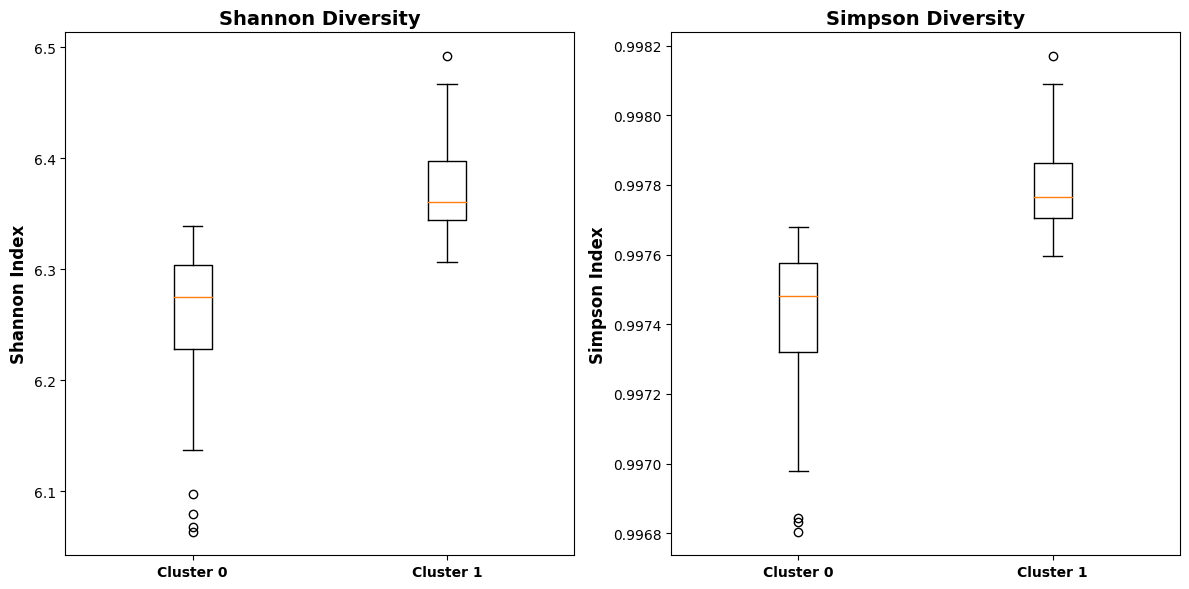

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Summarize alpha diversity metrics
alpha_summary = {
    'Cluster': ['Cluster 0', 'Cluster 1'],
    'Mean_Shannon': [cluster_0['Shannon'].mean(), cluster_1['Shannon'].mean()],
    'Std_Shannon': [cluster_0['Shannon'].std(), cluster_1['Shannon'].std()],
    'Mean_Simpson': [cluster_0['Simpson'].mean(), cluster_1['Simpson'].mean()],
    'Std_Simpson': [cluster_0['Simpson'].std(), cluster_1['Simpson'].std()]
}

alpha_df = pd.DataFrame(alpha_summary)
print(alpha_df)

# Visualize alpha diversity metrics
plt.figure(figsize=(12, 6))

# Plot Shannon diversity
plt.subplot(1, 2, 1)
plt.boxplot([cluster_0['Shannon'], cluster_1['Shannon']], labels=['Cluster 0', 'Cluster 1'])
plt.title('Shannon Diversity', fontsize=14, fontweight='bold')
plt.ylabel('Shannon Index', fontsize=12, fontweight='bold')
plt.gca().set_xticklabels(['Cluster 0', 'Cluster 1'], fontweight='bold')

# Plot Simpson diversity
plt.subplot(1, 2, 2)
plt.boxplot([cluster_0['Simpson'], cluster_1['Simpson']], labels=['Cluster 0', 'Cluster 1'])
plt.title('Simpson Diversity', fontsize=14, fontweight='bold')
plt.ylabel('Simpson Index', fontsize=12, fontweight='bold')
plt.gca().set_xticklabels(['Cluster 0', 'Cluster 1'], fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Calculate p-value for Shannon diversity
shannon_p_value = mannwhitneyu(cluster_0['Shannon'], cluster_1['Shannon']).pvalue

# Calculate p-value for Simpson diversity
simpson_p_value = mannwhitneyu(cluster_0['Simpson'], cluster_1['Simpson']).pvalue

print("Shannon Diversity p-value:", shannon_p_value)
print("Simpson Diversity p-value:", simpson_p_value)


Shannon Diversity p-value: 1.4329396494692816e-25
Simpson Diversity p-value: 1.4816423364103684e-25


In [ ]:
import pandas as pd

# Recreate the original mapping dictionary
# Assuming you still have the 'genus_mapping' dictionary or you can reconstruct it
# Original mapping (You should manually construct or obtain this)
# Example:
# original_mapping = {'m1': 'Genus1', 'm2': 'Genus2', ...}

# Reverse the genus_mapping dictionary
reverse_mapping = {v: k for k, v in genus_mapping.items()}

# Apply reverse mapping to rename columns
# Remove the 'Sample' column from the renaming process
flipped_df.rename(columns={col: reverse_mapping.get(col, col) for col in flipped_df.columns}, inplace=True)

# Display the updated DataFrame to check
print(flipped_df.head())


GENUS Sample  g__Prasinovirus  g__Simplexvirus  g__Aquamavirus  g__Mardivirus  \
0         s0              0.1              4.7             1.3            5.2   
1         s1              0.2              3.5             2.9            8.5   
2         s2              1.5              4.7             1.4            7.7   
3         s3              0.6              3.5             1.9            6.9   
4         s4              0.4              4.8             1.7            5.1   

GENUS  g__Taupapillomavirus  g__I3likevirus  g__Furovirus  g__Proboscivirus  \
0                       2.5            -1.5           3.1               6.9   
1                       0.9            -1.4           3.6               3.8   
2                       0.5            -0.3           1.9               6.0   
3                       1.3            -0.7           2.5               4.9   
4                       1.0            -0.9           3.4               5.4   

GENUS  g__Gammacoronavirus  ...  g__Po

In [ ]:
import pandas as pd

# Example DataFrame columns (including the 'g__' prefix)
# flipped_df.columns = ['Sample', 'g__Acaryochloris', 'g__Pseudomonas', 'Cluster']

# Remove 'g__' prefix from column names
flipped_df.columns = flipped_df.columns.str.replace('g__', '', regex=False)

# Display the updated DataFrame columns
print(flipped_df.head())


GENUS Sample  Prasinovirus  Simplexvirus  Aquamavirus  Mardivirus  \
0         s0           0.1           4.7          1.3         5.2   
1         s1           0.2           3.5          2.9         8.5   
2         s2           1.5           4.7          1.4         7.7   
3         s3           0.6           3.5          1.9         6.9   
4         s4           0.4           4.8          1.7         5.1   

GENUS  Taupapillomavirus  I3likevirus  Furovirus  Proboscivirus  \
0                    2.5         -1.5        3.1            6.9   
1                    0.9         -1.4        3.6            3.8   
2                    0.5         -0.3        1.9            6.0   
3                    1.3         -0.7        2.5            4.9   
4                    1.0         -0.9        3.4            5.4   

GENUS  Gammacoronavirus  ...  Polymorphum  Wohlfahrtiimonas  Kallipyga  \
0                   1.3  ...          3.0               1.8        1.9   
1                   2.9  ...      

In [ ]:
# PHYLUM MAPPING
import requests
import pandas as pd
from collections import defaultdict
import time

# Function to fetch taxon ID for a given microbe using NCBI E-utilities API
def fetch_taxon_id(microbe_name):
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=taxonomy&term={microbe_name}&retmode=json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if 'esearchresult' in data and 'idlist' in data['esearchresult'] and data['esearchresult']['idlist']:
                taxon_id = data['esearchresult']['idlist'][0]  # Get the first taxon ID
                return taxon_id
        return None
    except Exception as e:
        print(f"Error fetching taxon ID for {microbe_name}: {e}")
        return None

# Function to fetch phylum for a given taxon ID using NCBI E-utilities API
def fetch_phylum_by_taxon_id(taxon_id):
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=taxonomy&id={taxon_id}&retmode=json"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if 'result' in data and taxon_id in data['result']:
                taxon_data = data['result'][taxon_id]
                # Check if 'lineage' field is present and look for phylum
                if 'lineage' in taxon_data:
                    for lineage_item in taxon_data['lineage']:
                        if lineage_item['rank'] == 'phylum':
                            return lineage_item['scientificName']
                # Check if 'division' field is present
                if 'division' in taxon_data and taxon_data['division']:
                    return taxon_data['division']
        return None
    except Exception as e:
        print(f"Error fetching phylum for taxon ID {taxon_id}: {e}")
        return None

# Combined function to fetch phylum for a given microbe
def fetch_phylum(microbe_name):
    taxon_id = fetch_taxon_id(microbe_name)
    if taxon_id:
        return fetch_phylum_by_taxon_id(taxon_id)
    else:
        return None

# Load the DataFrame (assuming flipped_df is already loaded in the Google Colab environment)
# Remove 'g__' prefix from column names
cleaned_columns = [col.replace('g__', '') for col in flipped_df.columns if col not in ['Sample', 'Cluster']]
print("Cleaned column names:", cleaned_columns)

# Function to map all cleaned genus names to their phyla with retries
def map_microbes_to_phyla(microbes, retries=3):
    microbe_to_phylum = {}
    for microbe in microbes:
        for attempt in range(retries):
            phylum = fetch_phylum(microbe)
            if phylum:
                break
            time.sleep(1)  # Wait before retrying
        microbe_to_phylum[microbe] = phylum
        print(f"{microbe}: {phylum}")
    return microbe_to_phylum

# Map all cleaned genus names to their phyla
microbe_to_phylum_mapping = map_microbes_to_phyla(cleaned_columns)

# Print the final mapping
print("\nFinal Mapping of Microbes to Phyla:")
for microbe, phylum in microbe_to_phylum_mapping.items():
    print(f"{microbe}: {phylum}")

# Create a dictionary to map phyla to their respective microbes
phylum_to_microbes = defaultdict(list)
for microbe, phylum in microbe_to_phylum_mapping.items():
    if phylum:
        phylum_to_microbes[phylum].append(microbe)

# Print the mapping of phyla to microbes
print("\nPhylum to Microbes Mapping:")
for phylum, microbes in phylum_to_microbes.items():
    print(f'{phylum}: {microbes}')

# Optionally save the mapping to a DataFrame
phylum_mapping_df = pd.DataFrame.from_dict(microbe_to_phylum_mapping, orient='index', columns=['Phylum'])
phylum_mapping_df.to_csv('microbe_to_phylum_mapping.csv')


Cleaned column names: ['Prasinovirus', 'Simplexvirus', 'Aquamavirus', 'Mardivirus', 'Taupapillomavirus', 'I3likevirus', 'Furovirus', 'Proboscivirus', 'Gammacoronavirus', 'Spo1virus', 'Sicinivirus', 'Dicipivirus', 'Molluscipoxvirus', 'Tymovirus', 'Hepacivirus', 'Gammatorquevirus', 'Piscihepevirus', 'Pomovirus', 'Ichnovirus', 'Alphavirus', 'Sclerodarnavirus', 'Alpharetrovirus', 'Capripoxvirus', 'Higrevirus', 'Bafinivirus', 'Omegapapillomavirus', 'Chlorovirus', 'Hypovirus', 'Aparavirus', 'Hepatovirus', 'Tobamovirus', 'Arenavirus', 'Spounalikevirus', 'Betapartitivirus', 'Carlavirus', 'Alphacoronavirus', 'Bromovirus', 'Orthobunyavirus', 'Sapelovirus', 'Cafeteriavirus', 'Potyvirus', 'Muromegalovirus', 'Salivirus', 'Lentivirus', 'Fabavirus', 'Bracovirus', 'Rhadinovirus', 'Pestivirus', 'Betaretrovirus', 'Microvirus', 'Vesivirus', 'Rubulavirus', 'Emaravirus', 'Avastrovirus', 'Polyomavirus', 'Enterovirus', 'Waikavirus', 'T4likevirus', 'Mastadenovirus', 'Cytomegalovirus', 'Kobuvirus', 'Ranavirus'

In [ ]:
# Load the phylum mapping
phylum_mapping_df = pd.read_csv('microbe_to_phylum_mapping.csv', index_col=0)

# Create a dictionary for mapping
mapping_dict = phylum_mapping_df['Phylum'].to_dict()

# Clean column names by replacing 'g__' with the corresponding phylum name
flipped_df.columns = [mapping_dict.get(col.replace('g__', ''), col) for col in flipped_df.columns]


In [ ]:
print("Updated phylum names in flipped_df columns:")
print(flipped_df.columns.unique())


Updated phylum names in flipped_df columns:
Index([                         'Sample',                         'viruses',
                      'g-proteobacteria',                      'firmicutes',
                    'CFB group bacteria',                        'bacteria',
                        'enterobacteria',                'a-proteobacteria',
                         'cyanobacteria', 'high G+C Gram-positive bacteria',
                        'euryarchaeotes',                    'GNS bacteria',
                           'salamanders',                'b-proteobacteria',
                        'actinobacteria',                         'beetles',
                      'e-proteobacteria',                  'crenarchaeotes',
                         'scale insects',                     'mycoplasmas',
                          'fusobacteria',                  'planctomycetes',
                      'ascomycete fungi',                 'verrucomicrobia',
                 'green sulfur b

In [ ]:
import pandas as pd

# Assuming 'flipped_df' is already loaded and processed

# Calculate the average relative abundance for each phylum in each cluster
cluster_0_abundance = abundance_df[flipped_df['Cluster'] == 0].mean()
cluster_1_abundance = abundance_df[flipped_df['Cluster'] == 1].mean()

# Print the average relative abundance for each phylum in Cluster 0
print("Average Relative Abundance by Phylum in Cluster 0:")
print(cluster_0_abundance.sort_values(ascending=False))

# Print the average relative abundance for each phylum in Cluster 1
print("\nAverage Relative Abundance by Phylum in Cluster 1:")
print(cluster_1_abundance.sort_values(ascending=False))


NameError: name 'abundance_df' is not defined

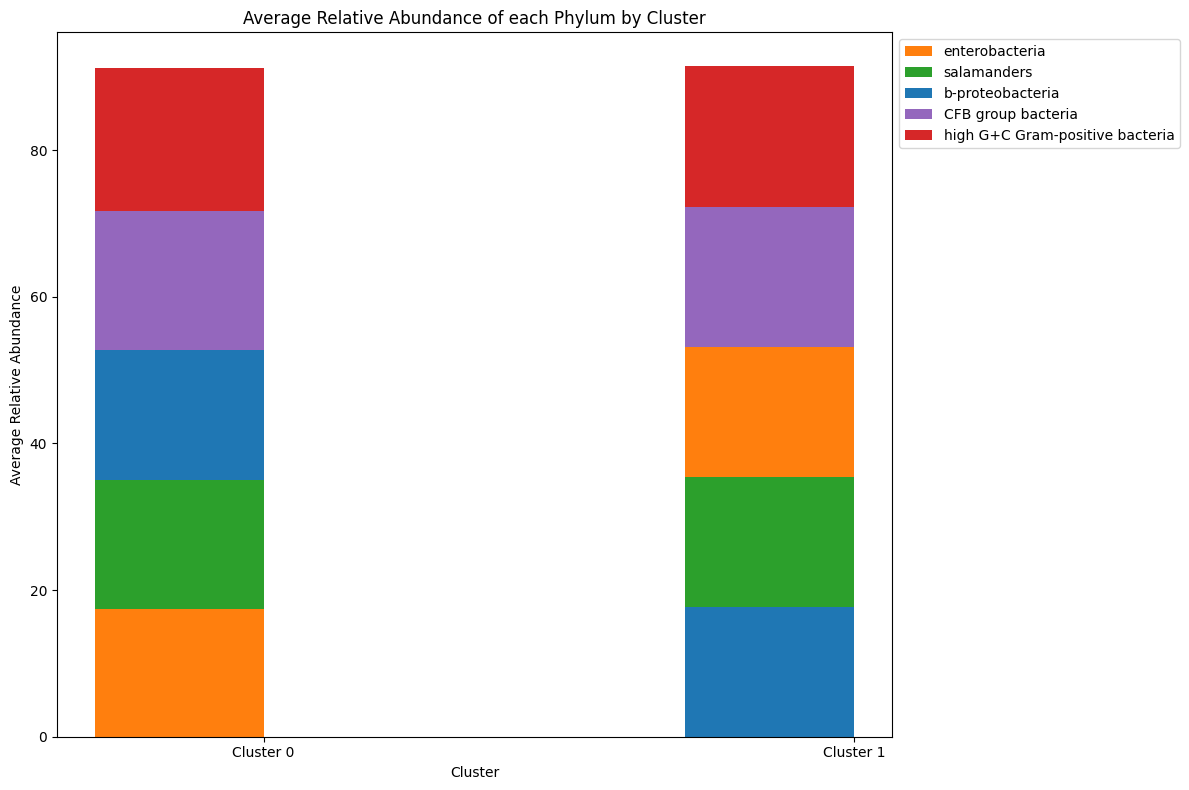

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Cluster 0 and Cluster 1
cluster_0_top5 = {
    'high G+C Gram-positive bacteria': 19.374590,
    'CFB group bacteria': 19.063115,
    'b-proteobacteria': 17.675410,
    'salamanders': 17.585246,
    'enterobacteria': 17.432787
}

cluster_1_top5 = {
    'high G+C Gram-positive bacteria': 19.210909,
    'CFB group bacteria': 19.096364,
    'enterobacteria': 17.816364,
    'salamanders': 17.734545,
    'b-proteobacteria': 17.625455
}

# Combine phyla from both clusters to ensure consistent color mapping
combined_phyla = set(cluster_0_top5.keys()).union(set(cluster_1_top5.keys()))
color_map = {phylum: plt.get_cmap('tab10')(i % 10) for i, phylum in enumerate(combined_phyla)}

# Sort the phyla in ascending order of their average relative abundance
sorted_cluster_0 = sorted(cluster_0_top5.items(), key=lambda x: x[1])
sorted_cluster_1 = sorted(cluster_1_top5.items(), key=lambda x: x[1])

# Create lists for plotting
phylum_names_0, abundance_0 = zip(*sorted_cluster_0)
phylum_names_1, abundance_1 = zip(*sorted_cluster_1)

# Define positions for the bars
positions = {'Cluster 0': 1, 'Cluster 1': 2}
width = 0.4  # Width of the bars

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Track patches for legend
handles = []

# Plot for Cluster 0
bottom_0 = np.zeros(len(phylum_names_0))
for i, (phylum, abundance) in enumerate(sorted_cluster_0):
    bar = ax.bar(positions['Cluster 0'], abundance, width, bottom=bottom_0, color=color_map[phylum])
    bottom_0 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Plot for Cluster 1
bottom_1 = np.zeros(len(phylum_names_1))
for i, (phylum, abundance) in enumerate(sorted_cluster_1):
    bar = ax.bar(positions['Cluster 1'] + width, abundance, width, bottom=bottom_1, color=color_map[phylum])
    bottom_1 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Add labels and legend
ax.set_title('Average Relative Abundance of each Phylum by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Relative Abundance')
ax.set_xticks([positions['Cluster 0'] + width / 2, positions['Cluster 1'] + width + width / 2])
ax.set_xticklabels(['Cluster 0', 'Cluster 1'])

# Create legend with custom patches
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


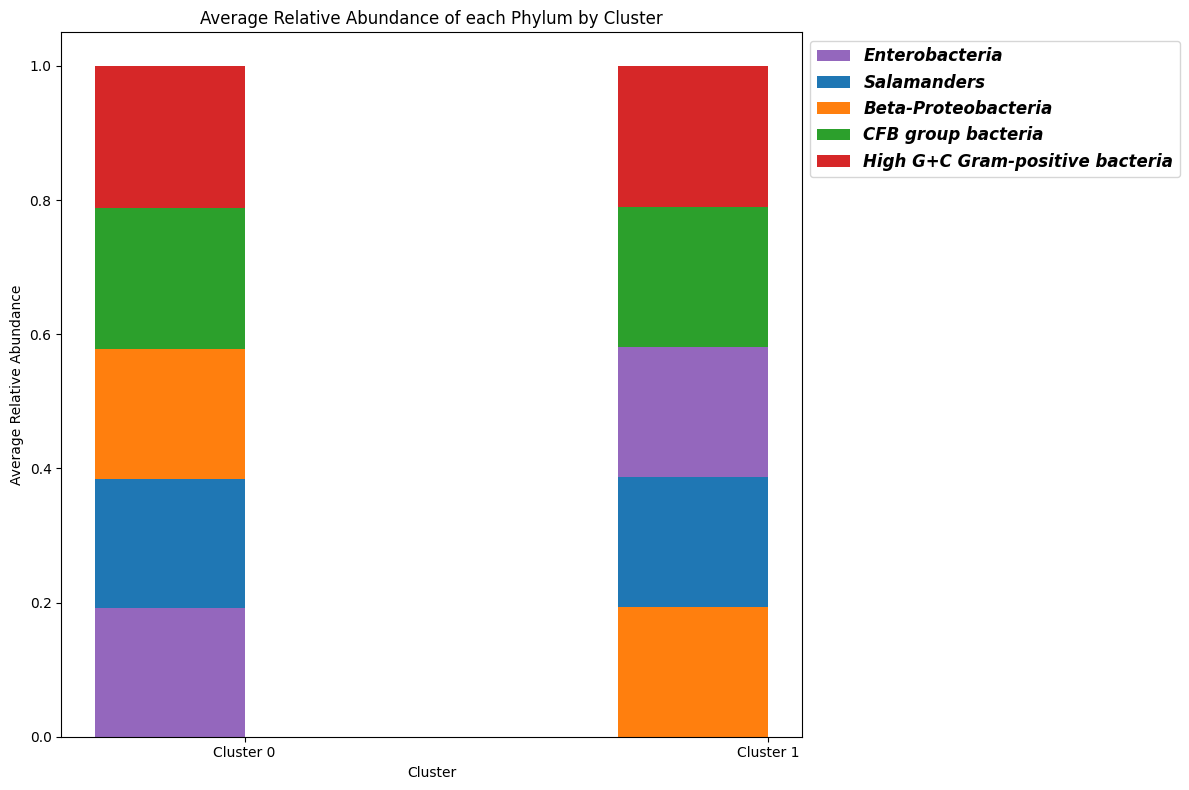

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# Data for Cluster 0 and Cluster 1
cluster_0_top5 = {
    'High G+C Gram-positive bacteria': 0.2126,
    'CFB group bacteria': 0.2092,
    'Beta-Proteobacteria': 0.1940,
    'Salamanders': 0.1930,
    'Enterobacteria': 0.1912
}

cluster_1_top5 = {
    'High G+C Gram-positive bacteria': 0.2100,
    'CFB group bacteria': 0.2087,
    'Enterobacteria': 0.1947,
    'Salamanders': 0.1939,
    'Beta-Proteobacteria': 0.1927
}

# Combine phyla from both clusters to ensure consistent color mapping
combined_phyla = set(cluster_0_top5.keys()).union(set(cluster_1_top5.keys()))
color_map = {phylum: plt.get_cmap('tab10')(i % 10) for i, phylum in enumerate(combined_phyla)}

# Sort the phyla in ascending order of their average relative abundance
sorted_cluster_0 = sorted(cluster_0_top5.items(), key=lambda x: x[1])
sorted_cluster_1 = sorted(cluster_1_top5.items(), key=lambda x: x[1])

# Create lists for plotting
phylum_names_0, abundance_0 = zip(*sorted_cluster_0)
phylum_names_1, abundance_1 = zip(*sorted_cluster_1)

# Define positions for the bars
positions = {'Cluster 0': 1, 'Cluster 1': 2}
width = 0.4  # Width of the bars

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Track patches for legend
handles = []

# Plot for Cluster 0
bottom_0 = np.zeros(len(phylum_names_0))
for i, (phylum, abundance) in enumerate(sorted_cluster_0):
    bar = ax.bar(positions['Cluster 0'], abundance, width, bottom=bottom_0, color=color_map[phylum])
    bottom_0 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Plot for Cluster 1
bottom_1 = np.zeros(len(phylum_names_1))
for i, (phylum, abundance) in enumerate(sorted_cluster_1):
    bar = ax.bar(positions['Cluster 1'] + width, abundance, width, bottom=bottom_1, color=color_map[phylum])
    bottom_1 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Add labels and legend
ax.set_title('Average Relative Abundance of each Phylum by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Relative Abundance')
ax.set_xticks([positions['Cluster 0'] + width / 2, positions['Cluster 1'] + width + width / 2])
ax.set_xticklabels(['Cluster 0', 'Cluster 1'])

# Customize the font properties for the legend
font_prop = FontProperties(weight='bold', style='italic', size=12)  # Set bold, italic, and size

# Create legend with custom patches
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), prop=font_prop)

# Show plot
plt.tight_layout()
plt.show()


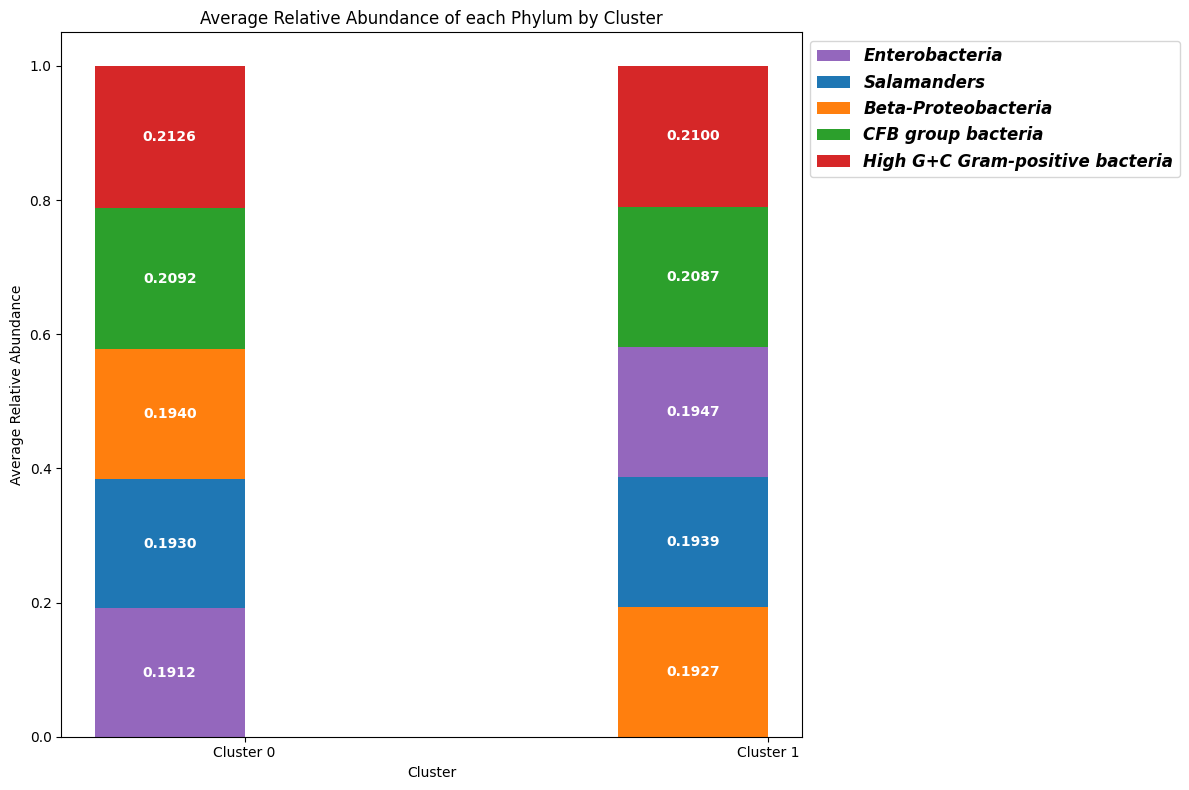

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# Data for Cluster 0 and Cluster 1
cluster_0_top5 = {
    'High G+C Gram-positive bacteria': 0.2126,
    'CFB group bacteria': 0.2092,
    'Beta-Proteobacteria': 0.1940,
    'Salamanders': 0.1930,
    'Enterobacteria': 0.1912
}

cluster_1_top5 = {
    'High G+C Gram-positive bacteria': 0.2100,
    'CFB group bacteria': 0.2087,
    'Enterobacteria': 0.1947,
    'Salamanders': 0.1939,
    'Beta-Proteobacteria': 0.1927
}

# Combine phyla from both clusters to ensure consistent color mapping
combined_phyla = set(cluster_0_top5.keys()).union(set(cluster_1_top5.keys()))
color_map = {phylum: plt.get_cmap('tab10')(i % 10) for i, phylum in enumerate(combined_phyla)}

# Sort the phyla in ascending order of their average relative abundance
sorted_cluster_0 = sorted(cluster_0_top5.items(), key=lambda x: x[1])
sorted_cluster_1 = sorted(cluster_1_top5.items(), key=lambda x: x[1])

# Create lists for plotting
phylum_names_0, abundance_0 = zip(*sorted_cluster_0)
phylum_names_1, abundance_1 = zip(*sorted_cluster_1)

# Define positions for the bars
positions = {'Cluster 0': 1, 'Cluster 1': 2}
width = 0.4  # Width of the bars

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Track patches for legend
handles = []

# Plot for Cluster 0
bottom_0 = np.zeros(len(phylum_names_0))
for i, (phylum, abundance) in enumerate(sorted_cluster_0):
    bar = ax.bar(positions['Cluster 0'], abundance, width, bottom=bottom_0, color=color_map[phylum])

    # Add text for the abundance inside the bars
    ax.text(positions['Cluster 0'], bottom_0[i] + abundance / 2, f'{abundance:.4f}',
            ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    bottom_0 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Plot for Cluster 1
bottom_1 = np.zeros(len(phylum_names_1))
for i, (phylum, abundance) in enumerate(sorted_cluster_1):
    bar = ax.bar(positions['Cluster 1'] + width, abundance, width, bottom=bottom_1, color=color_map[phylum])

    # Add text for the abundance inside the bars
    ax.text(positions['Cluster 1'] + width, bottom_1[i] + abundance / 2, f'{abundance:.4f}',
            ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    bottom_1 += abundance
    if phylum not in [h.get_label() for h in handles]:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc=color_map[phylum], edgecolor='none', label=phylum))

# Add labels and legend
ax.set_title('Average Relative Abundance of each Phylum by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Relative Abundance')
ax.set_xticks([positions['Cluster 0'] + width / 2, positions['Cluster 1'] + width + width / 2])
ax.set_xticklabels(['Cluster 0', 'Cluster 1'])

# Customize the font properties for the legend
font_prop = FontProperties(weight='bold', style='italic', size=12)  # Set bold, italic, and size

# Create legend with custom patches
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), prop=font_prop)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Mann Whitney Wilcoxon test
import pandas as pd
from scipy.stats import mannwhitneyu

# Example DataFrame setup
# Replace this with your actual data
data = {
    'Cluster': ['Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 0',
                'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1'],
    'Phylum': ['high G+C Gram-positive bacteria', 'CFB group bacteria', 'b-proteobacteria',
               'salamanders', 'enterobacteria', 'high G+C Gram-positive bacteria',
               'CFB group bacteria', 'enterobacteria', 'salamanders', 'b-proteobacteria'],
    'Abundance': [19.374590, 19.063115, 17.675410, 17.585246, 17.432787,
                  19.210909, 19.096364, 17.816364, 17.734545, 17.625455]
}

df = pd.DataFrame(data)

# Prepare data for Mann-Whitney U test
results = []
for phylum in df['Phylum'].unique():
    cluster_0_abundance = df[(df['Cluster'] == 'Cluster 0') & (df['Phylum'] == phylum)]['Abundance']
    cluster_1_abundance = df[(df['Cluster'] == 'Cluster 1') & (df['Phylum'] == phylum)]['Abundance']

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(cluster_0_abundance, cluster_1_abundance, alternative='two-sided')

    # Collect results
    results.append({
        'Phylum': phylum,
        'U-statistic': stat,
        'p-value': p_value
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print("Mann-Whitney U Test Results:")
print(results_df)



PERMANOVA Results:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                     177
number of groups                  2
test statistic            30.453317
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.011228330507734419 and the largest is 0.45555616885071143.
  warn(


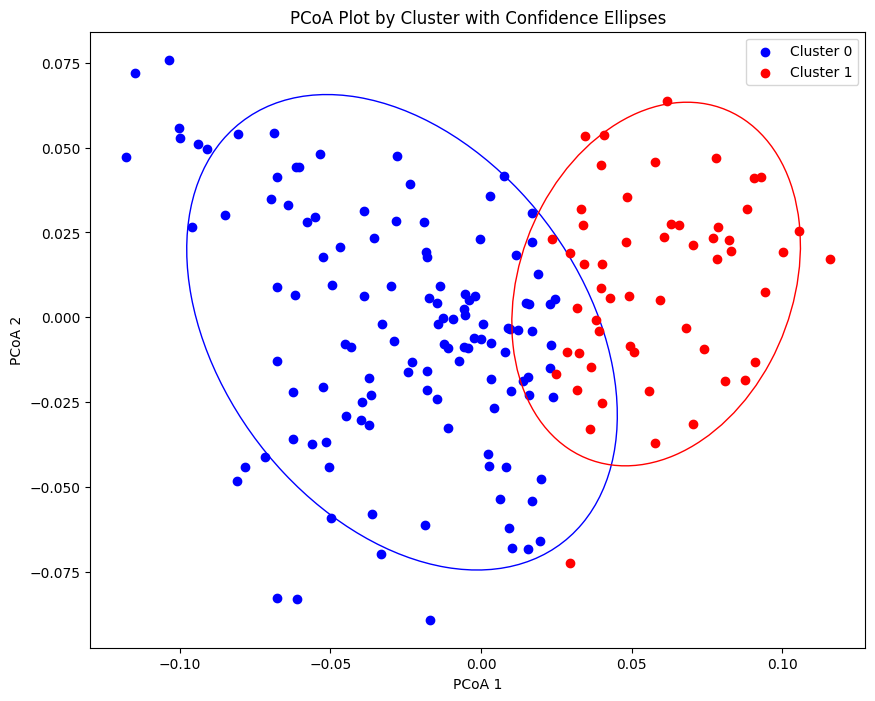

In [ ]:
# PERMANOVA TEST
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix, permanova
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.transforms import Affine2D

# Function to plot ellipses
def plot_ellipse(x, y, ax, n_std=2.0, **kwargs):
    """
    Plot a covariance confidence ellipse based on x and y data.
    """
    if len(x) < 2:
        return

    cov = np.cov(x, y)
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))

    width, height = 2 * n_std * np.sqrt(eigenvals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=width, height=height,
                  angle=angle, **kwargs)

    ax.add_patch(ell)

# Ensure 'Sample' is set as the index
if 'Sample' in flipped_df.columns:
    flipped_df.set_index('Sample', inplace=True)

# Extract cluster information
clusters = flipped_df['Cluster']

# Filter to include only Cluster 0 and Cluster 1
valid_samples = clusters[clusters.isin([0, 1])].index
filtered_df = flipped_df.loc[valid_samples]

# Extract grouping vector
grouping = clusters.loc[valid_samples]

# Remove 'Cluster' column from filtered_df for distance computation
filtered_pivot_df = filtered_df.drop(columns=['Cluster'])

# Compute the distance matrix
distance_matrix = pdist(filtered_pivot_df.values, metric='braycurtis')
distance_matrix = squareform(distance_matrix)

# Create DistanceMatrix object
dm = DistanceMatrix(distance_matrix, ids=filtered_pivot_df.index)

# Perform PERMANOVA
permanova_results = permanova(dm, grouping)

print("\nPERMANOVA Results:")
print(permanova_results)

# Perform PCoA
pcoa_results = pcoa(dm)
pcoa_coords = pcoa_results.samples

# Plot PCoA results with confidence ellipses
plt.figure(figsize=(10, 8))
ax = plt.gca()

colors = ['blue', 'red']
for i, cluster in enumerate([0, 1]):
    subset = pcoa_coords.loc[grouping == cluster]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], label=f"Cluster {cluster}", color=colors[i])

    # Add confidence ellipse
    plot_ellipse(subset.iloc[:, 0], subset.iloc[:, 1], ax=ax, edgecolor=colors[i], facecolor='none')

plt.xlabel('PCoA 1')
plt.ylabel('PCoA 2')
plt.title('PCoA Plot by Cluster with Confidence Ellipses')
plt.legend()
plt.show()



PERMANOVA Results:
p-value: 0.001
Test Statistic (pseudo-F): 30.453317131711355


/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.011228330507734419 and the largest is 0.45555616885071143.
  warn(



Multivariate Dispersion (PERMDISP) Results:
method name                PERMDISP
test statistic name         F-value
sample size                     177
number of groups                  2
test statistic            24.486325
p-value                       0.001
number of permutations          999
Name: PERMDISP results, dtype: object


/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.011228330507734419 and the largest is 0.45555616885071143.
  warn(


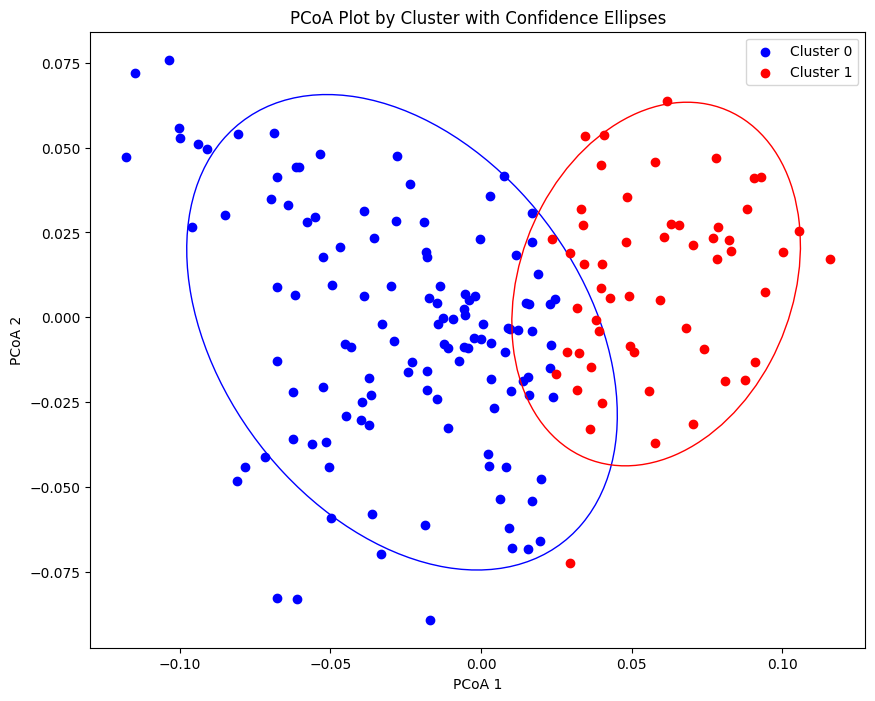

In [ ]:
# PERMANOVA TEST
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix, permanova, permdisp
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to plot ellipses
def plot_ellipse(x, y, ax, n_std=2.0, **kwargs):
    """
    Plot a covariance confidence ellipse based on x and y data.
    """
    if len(x) < 2:
        return

    cov = np.cov(x, y)
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))

    width, height = 2 * n_std * np.sqrt(eigenvals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=width, height=height,
                  angle=angle, **kwargs)

    ax.add_patch(ell)

# Ensure 'Sample' is set as the index
if 'Sample' in flipped_df.columns:
    flipped_df.set_index('Sample', inplace=True)

# Extract cluster information
clusters = flipped_df['Cluster']

# Filter to include only Cluster 0 and Cluster 1
valid_samples = clusters[clusters.isin([0, 1])].index
filtered_df = flipped_df.loc[valid_samples]

# Extract grouping vector
grouping = clusters.loc[valid_samples]

# Remove 'Cluster' column from filtered_df for distance computation
filtered_pivot_df = filtered_df.drop(columns=['Cluster'])

# Compute the distance matrix
distance_matrix = pdist(filtered_pivot_df.values, metric='braycurtis')
distance_matrix = squareform(distance_matrix)

# Create DistanceMatrix object
dm = DistanceMatrix(distance_matrix, ids=filtered_pivot_df.index)

# Perform PERMANOVA
permanova_results = permanova(dm, grouping)

# Display PERMANOVA results including p-value and test statistic
print("\nPERMANOVA Results:")
print(f"p-value: {permanova_results['p-value']}")
print(f"Test Statistic (pseudo-F): {permanova_results['test statistic']}")

# Evaluate Multivariate Dispersion (PERMDISP)
dispersion_results = permdisp(dm, grouping)

# Print all results from PERMDISP to check available keys
print("\nMultivariate Dispersion (PERMDISP) Results:")
print(dispersion_results)

# Perform PCoA
pcoa_results = pcoa(dm)
pcoa_coords = pcoa_results.samples

# Plot PCoA results with confidence ellipses
plt.figure(figsize=(10, 8))
ax = plt.gca()

colors = ['blue', 'red']
for i, cluster in enumerate([0, 1]):
    subset = pcoa_coords.loc[grouping == cluster]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], label=f"Cluster {cluster}", color=colors[i])

    # Add confidence ellipse
    plot_ellipse(subset.iloc[:, 0], subset.iloc[:, 1], ax=ax, edgecolor=colors[i], facecolor='none')

plt.xlabel('PCoA 1')
plt.ylabel('PCoA 2')
plt.title('PCoA Plot by Cluster with Confidence Ellipses')
plt.legend()
plt.show()


In [ ]:
# Print PERMANOVA results
print("\nPERMANOVA Results:")
print(f"p-value: {permanova_results['p-value']}")
print(f"Test Statistic (pseudo-F): {permanova_results['test statistic']}")

# Print PERMDISP results
print("\nMultivariate Dispersion (PERMDISP) Results:")
print(f"p-value: {dispersion_results['p-value']}")
print(f"Test Statistic (F-value): {dispersion_results['test statistic']}")



PERMANOVA Results:
p-value: 0.001
Test Statistic (pseudo-F): 30.453317131711355

Multivariate Dispersion (PERMDISP) Results:
p-value: 0.001
Test Statistic (F-value): 24.48632474776861


In [ ]:
from skbio.stats.distance import permanova

# Perform PERMANOVA with increased permutations
num_permutations = 10000  # Adjust this value as needed
permanova_results = permanova(dm, grouping, permutations=num_permutations)

# Print results
print("\nPERMANOVA Results with Increased Permutations:")
print(f"p-value: {permanova_results['p-value']}")
print(f"Test Statistic (pseudo-F): {permanova_results['test statistic']}")



PERMANOVA Results with Increased Permutations:
p-value: 9.999000099990002e-05
Test Statistic (pseudo-F): 30.453317131711355


In [ ]:
# Extract values from PERMANOVA results
pseudo_f = permanova_results['test statistic']
num_samples = len(filtered_df)  # Total number of samples
num_groups = len(set(grouping))  # Number of groups

# Calculate R² (Explained Variance)
r_squared = pseudo_f / (pseudo_f + (num_samples - num_groups))

# Print PERMANOVA results
print("\nPERMANOVA Results:")
print(f"p-value: {permanova_results['p-value']}")
print(f"Test Statistic (pseudo-F): {pseudo_f}")
print(f"R² (Explained Variance): {r_squared}")

# Print PERMDISP results
print("\nMultivariate Dispersion (PERMDISP) Results:")
print(f"p-value: {dispersion_results['p-value']}")
print(f"Test Statistic (F-value): {dispersion_results['test statistic']}")



PERMANOVA Results:
p-value: 0.001
Test Statistic (pseudo-F): 30.453317131711355
R² (Explained Variance): 0.14822499610550674

Multivariate Dispersion (PERMDISP) Results:
p-value: 0.001
Test Statistic (F-value): 24.48632474776861


In [ ]:
# Model Development - LR/RF
# Drop 'Sample' and 'Cluster' along with other columns you don't need for X
columns_to_drop = ['Sample', 'Cluster']  # Add other columns if necessary

# Ensure that the columns to drop exist in flipped_df
for col in columns_to_drop:
    if col not in flipped_df.columns:
        print(f"Column '{col}' not found in flipped_df.")

# Drop specified columns from flipped_df to create X (features) and y (target)
X = flipped_df.drop(columns_to_drop, axis=1)
y = flipped_df['Cluster']

# Now you can proceed with scaling your data and any further analysis


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming flipped_df is defined and contains the necessary data

# Extract features (X) and target (y) from flipped_df
X = flipped_df.drop(['Sample', 'Cluster'], axis=1)
y = flipped_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
    'ROC AUC': roc_auc_score
}

# Initialize results dictionary
results = {metric: {name: None for name in classifiers} for metric in metrics}

# Evaluate classifiers and store results for each metric
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    for metric_name, metric_func in metrics.items():
        results[metric_name][name] = metric_func(y_test, y_pred)

# Create DataFrame from results
metrics_df = pd.DataFrame(results)

# Display the results
print(metrics_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 40, number of negative: 101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20588
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 806
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283688 -> initscore=-0.926241
[LightGBM] [Info] Start training from score -0.926241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming flipped_df is defined and contains the necessary data

# Extract features (X) and target (y) from flipped_df
X = flipped_df.drop(['Sample', 'Cluster'], axis=1)
y = flipped_df['Cluster']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_scaled, y)

# Get feature importances
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 50 features for each cluster
top_features = feature_importance.head(50)
print("Top 50 features distinguishing Cluster 0 and Cluster 1:")
print(top_features)


Top 50 features distinguishing Cluster 0 and Cluster 1:
    Feature  Importance
777    m776    0.135096
538    m537    0.134795
372    m373    0.132585
91      m92    0.131316
605    m604    0.125004
672    m671    0.119645
120    m121    0.118381
712    m711    0.116789
386    m387    0.114390
110    m111    0.109966
296    m297    0.109417
577    m576    0.107608
764    m763    0.106820
416    m417    0.104571
771    m770    0.103209
418    m419    0.102330
536    m535    0.100865
547    m546    0.100597
544    m543    0.099673
718    m717    0.099271
258    m259    0.098402
76      m77    0.098243
288    m289    0.097024
607    m606    0.096458
716    m715    0.095832
154    m155    0.095443
365    m366    0.095309
48      m49    0.095301
526    m525    0.094314
739    m738    0.093884
123    m124    0.093711
38      m39    0.092957
206    m207    0.092529
495    m494    0.092054
763    m762    0.091462
735    m734    0.089970
519    m518    0.089855
224    m225    0.089658
571    m

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Extract features (X) and target (y) from flipped_df
X = flipped_df.drop(['Sample', 'Cluster'], axis=1)
y = flipped_df['Cluster']

# Initialize and fit Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 features for the whole dataset
print("Top 10 features overall:")
print(feature_importance.head(10))

# Separate the top features for Cluster 0 and Cluster 1
top_features_cluster_0 = X.loc[flipped_df['Cluster'] == 0, feature_importance.head(10)['Feature']].mean().sort_values(ascending=False)
top_features_cluster_1 = X.loc[flipped_df['Cluster'] == 1, feature_importance.head(10)['Feature']].mean().sort_values(ascending=False)

print("\nTop 10 features for Cluster 0:")
print(top_features_cluster_0)

print("\nTop 10 features for Cluster 1:")
print(top_features_cluster_1)


Top 10 features overall:
    Feature  Importance
771    m770    0.037692
510    m509    0.027948
163    m164    0.024287
515    m514    0.023151
508    m507    0.022894
763    m762    0.021763
281    m282    0.021669
483    m482    0.021612
90      m91    0.019288
465    m464    0.015818

Top 10 features for Cluster 0:
GENUS
m282    2.943443
m464    2.611475
m762    2.369672
m482    2.328689
m91     2.136885
m164    2.121311
m507    2.068852
m509    2.030328
m514    1.790164
m770    1.070492
dtype: float64

Top 10 features for Cluster 1:
GENUS
m282    3.605455
m464    3.358182
m762    3.141818
m482    3.114545
m164    2.990909
m91     2.898182
m509    2.781818
m507    2.767273
m514    2.634545
m770    1.901818
dtype: float64


P-values and their significance levels for each selected microbe:
m308: p = 7.600e-20 (***)
m779: p = 6.349e-22 (***)
m282: p = 5.943e-20 (***)
m160: p = 6.242e-19 (***)
m491: p = 2.536e-18 (***)
m387: p = 9.103e-23 (***)
m339: p = 2.638e-18 (***)
m464: p = 8.115e-22 (***)
m349: p = 2.988e-22 (***)
m794: p = 1.991e-21 (***)
m273: p = 1.846e-22 (***)


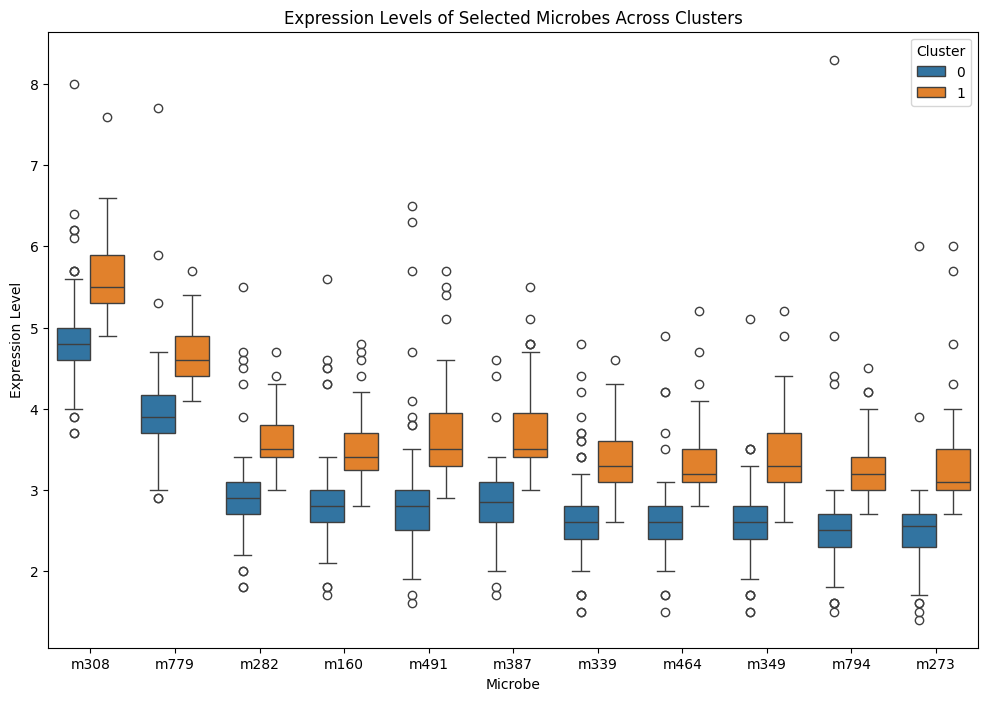

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# List of selected microbes (replace with your selected microbes)
selected_microbes = ['m308', 'm779', 'm282', 'm160', 'm491', 'm387', 'm339', 'm464', 'm349', 'm794', 'm273']

# Extract data for selected microbes
microbe_data = flipped_df[['Sample', 'Cluster'] + selected_microbes]

# Melt the DataFrame for plotting
melted_df = microbe_data.melt(id_vars=['Sample', 'Cluster'], value_vars=selected_microbes,
                              var_name='Microbe', value_name='Expression')

# Perform Mann-Whitney U tests and collect p-values
p_values = {}
for microbe in selected_microbes:
    cluster_0 = flipped_df[flipped_df['Cluster'] == 0][microbe]
    cluster_1 = flipped_df[flipped_df['Cluster'] == 1][microbe]
    u_stat, p_val = mannwhitneyu(cluster_0, cluster_1, alternative='two-sided')
    p_values[microbe] = p_val

# Print p-values and their significance
print("P-values and their significance levels for each selected microbe:")
for microbe, p_val in p_values.items():
    if p_val <= 0.001:
        significance = "***"
    elif p_val <= 0.01:
        significance = "**"
    elif p_val <= 0.05:
        significance = "*"
    else:
        significance = "ns"  # not significant
    print(f"{microbe}: p = {p_val:.3e} ({significance})")

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Microbe', y='Expression', hue='Cluster', data=melted_df)
plt.title('Expression Levels of Selected Microbes Across Clusters')
plt.xlabel('Microbe')
plt.ylabel('Expression Level')
plt.legend(title='Cluster')
plt.show()


P-values and their significance levels for each selected microbe:
m770: p = 2.688e-23 (***)
m509: p = 5.324e-23 (***)
m164: p = 3.321e-23 (***)
m514: p = 5.627e-25 (***)
m507: p = 2.570e-21 (***)
m762: p = 1.611e-22 (***)
m282: p = 5.943e-20 (***)
m482: p = 5.298e-22 (***)
m91: p = 6.985e-24 (***)
m464: p = 8.115e-22 (***)


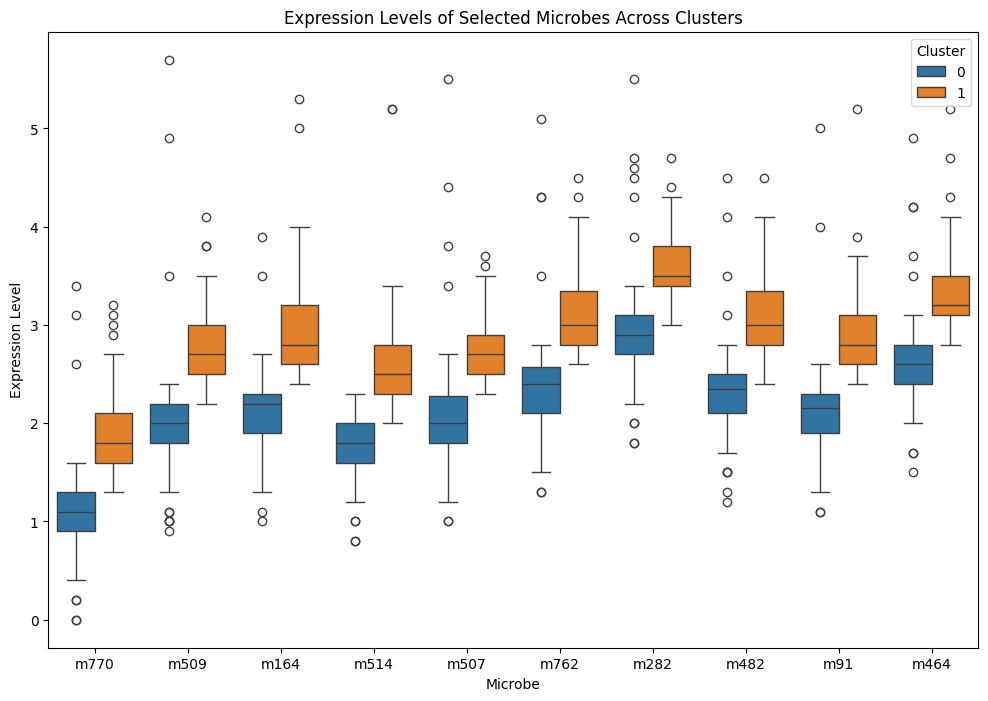

In [ ]:
#top 10 LR
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# List of selected microbes (replace with your selected microbes)
selected_microbes = ['m770', 'm509', 'm164', 'm514', 'm507', 'm762', 'm282', 'm482', 'm91', 'm464']

# Extract data for selected microbes
microbe_data = flipped_df[['Sample', 'Cluster'] + selected_microbes]

# Melt the DataFrame for plotting
melted_df = microbe_data.melt(id_vars=['Sample', 'Cluster'], value_vars=selected_microbes,
                              var_name='Microbe', value_name='Expression')

# Perform Mann-Whitney U tests and collect p-values
p_values = {}
for microbe in selected_microbes:
    cluster_0 = flipped_df[flipped_df['Cluster'] == 0][microbe]
    cluster_1 = flipped_df[flipped_df['Cluster'] == 1][microbe]
    u_stat, p_val = mannwhitneyu(cluster_0, cluster_1, alternative='two-sided')
    p_values[microbe] = p_val

# Print p-values and their significance
print("P-values and their significance levels for each selected microbe:")
for microbe, p_val in p_values.items():
    if p_val <= 0.001:
        significance = "***"
    elif p_val <= 0.01:
        significance = "**"
    elif p_val <= 0.05:
        significance = "*"
    else:
        significance = "ns"  # not significant
    print(f"{microbe}: p = {p_val:.3e} ({significance})")

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Microbe', y='Expression', hue='Cluster', data=melted_df)
plt.title('Expression Levels of Selected Microbes Across Clusters')
plt.xlabel('Microbe')
plt.ylabel('Expression Level')
plt.legend(title='Cluster')
plt.show()


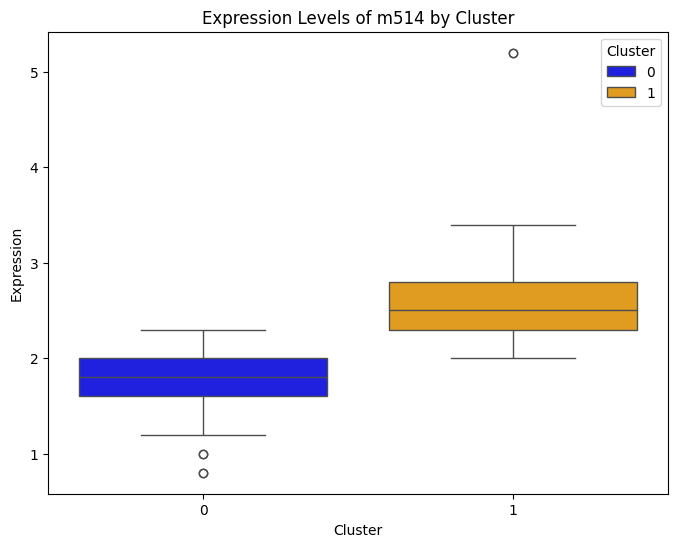

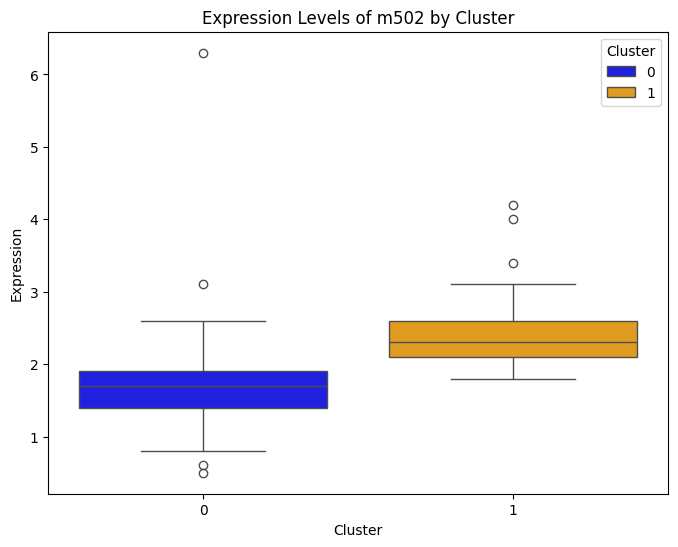

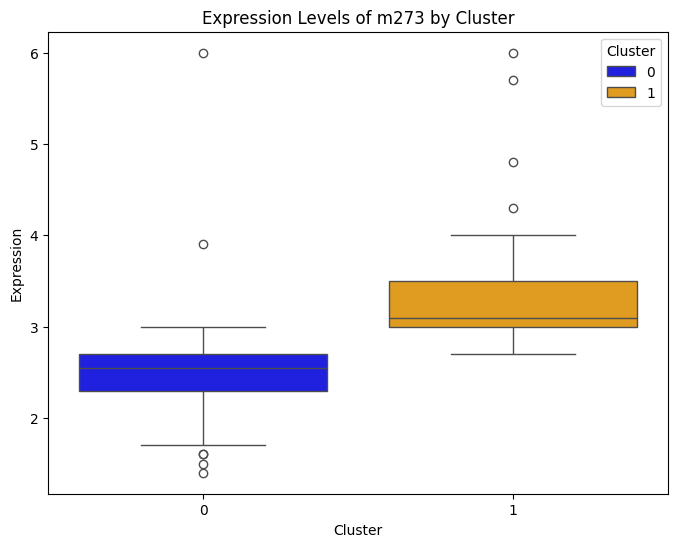

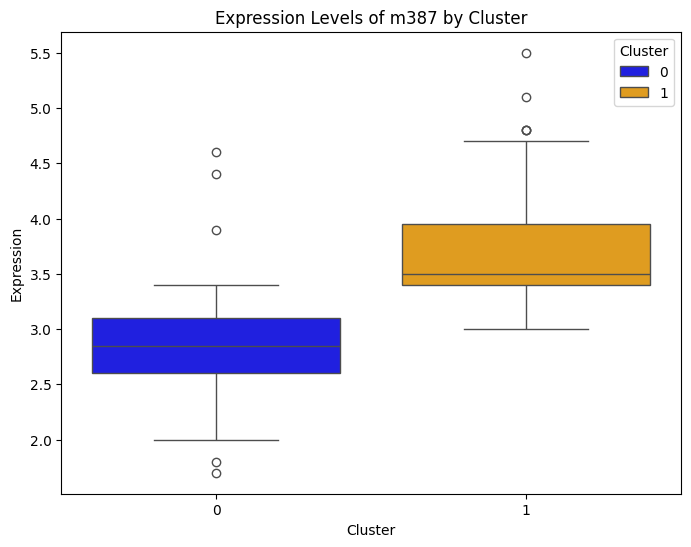

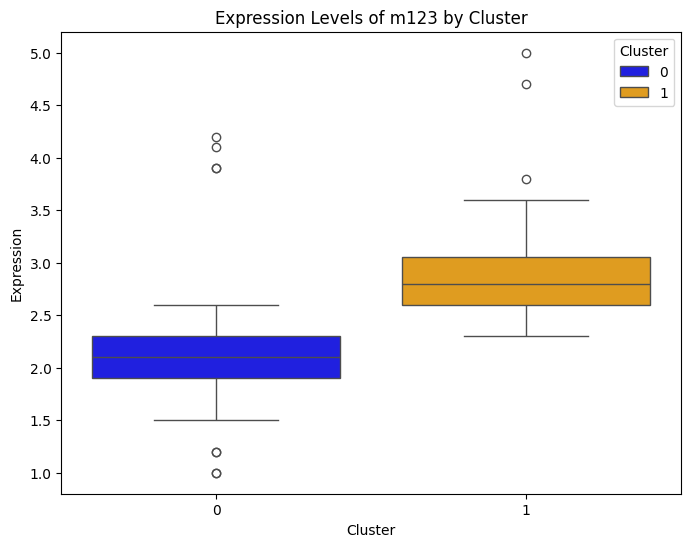

In [ ]:
# Separate box plots for better presentation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'flipped_df'

# List of top 10 microbes
top_10_microbes = ['m514', 'm502', 'm273', 'm387', 'm123']

# Loop through each microbe to create individual box plots
for microbe in top_10_microbes:
    # Extract data for the current microbe and the Cluster label
    plot_data = flipped_df[[microbe, 'Cluster']]

    # Plot box plot for the current microbe with different colors for each cluster
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='Cluster', y=microbe, data=plot_data, hue='Cluster', palette={0: 'blue', 1: 'orange'})
    plt.title(f'Expression Levels of {microbe} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Expression')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


In [ ]:
# Read the data
clinical_df=pd.read_excel("/content/drive/MyDrive/Clinical Data Updated 1.xlsx")
clinical_df.head()

,PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,PATH_M_STAGE,RADIATION_THERAPY,OS_STATUS,OS_MONTHS
0,TCGA-IB-AAUR-01,67,Male,STAGE IIB,M0,No,0:LIVING,11
1,TCGA-IB-8126-01,79,Female,STAGE III,M0,No,0:LIVING,15
2,TCGA-3A-A9IH-01,66,Female,STAGE IA,MX,No,0:LIVING,34
3,TCGA-HZ-A8P1-01,81,Male,STAGE IB,MX,NaN,0:LIVING,0
4,TCGA-HZ-A49I-01,77,Male,STAGE IIB,MX,Yes,1:DECEASED,10


In [ ]:
import pandas as pd

# Assuming clinical_df is already loaded

# Generate new sample identifiers starting from s0
num_samples = len(clinical_df)
new_sample_ids = [f's{i}' for i in range(num_samples)]

# Replace the 'PATIENT_ID' column with the new sample identifiers
clinical_df['PATIENT_ID'] = new_sample_ids

# Display the first few rows of the updated DataFrame
print(clinical_df.head())


  PATIENT_ID  AGE     SEX AJCC_PATHOLOGIC_TUMOR_STAGE PATH_M_STAGE  \
0         s0   67    Male                   STAGE IIB           M0   
1         s1   79  Female                   STAGE III           M0   
2         s2   66  Female                    STAGE IA           MX   
3         s3   81    Male                    STAGE IB           MX   
4         s4   77    Male                   STAGE IIB           MX   

  RADIATION_THERAPY   OS_STATUS  OS_MONTHS  
0                No    0:LIVING         11  
1                No    0:LIVING         15  
2                No    0:LIVING         34  
3               NaN    0:LIVING          0  
4               Yes  1:DECEASED         10  


In [ ]:
import pandas as pd

# Assuming both DataFrames are already loaded as flipped_df and clinical_df

# Rename 'Sample' column in flipped_df to match 'PATIENT_ID' for merging
flipped_df = flipped_df.rename(columns={'Sample': 'PATIENT_ID'})

# Merge the DataFrames on 'PATIENT_ID'
merged_df = pd.merge(clinical_df, flipped_df, on='PATIENT_ID', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


  PATIENT_ID  AGE     SEX AJCC_PATHOLOGIC_TUMOR_STAGE PATH_M_STAGE  \
0         s0   67    Male                   STAGE IIB           M0   
1         s1   79  Female                   STAGE III           M0   
2         s2   66  Female                    STAGE IA           MX   
3         s3   81    Male                    STAGE IB           MX   
4         s4   77    Male                   STAGE IIB           MX   

  RADIATION_THERAPY   OS_STATUS  OS_MONTHS   m1   m2  ...  m796  m797  m798  \
0                No    0:LIVING         11  0.1  4.7  ...   3.0   1.8   1.9   
1                No    0:LIVING         15  0.2  3.5  ...   1.5   1.8   1.9   
2                No    0:LIVING         34  1.5  4.7  ...   1.4   1.6   1.7   
3               NaN    0:LIVING          0  0.6  3.5  ...   2.1   2.4   2.5   
4               Yes  1:DECEASED         10  0.4  4.8  ...   1.8   2.2   2.3   

   m799  m800  m801  m802  m803  m804  Cluster  
0   4.2   0.9   1.0   1.8   1.4   1.8        0  
1   0.

In [ ]:
# Check the number of rows in the merged DataFrame
print("Number of rows in merged_df:", len(merged_df))


Number of rows in merged_df: 177


In [ ]:
# Count the number of occurrences of each value in the 'SEX' column
sex_counts = merged_df['SEX'].value_counts()

# Display the counts
print(sex_counts)


In [ ]:
# Get a summary of the 'AGE' column
age_summary = merged_df['AGE'].describe()

# Display the summary
print(age_summary)


In [ ]:
# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Cut the 'AGE' column into the defined bins
merged_df['Age_Range'] = pd.cut(merged_df['AGE'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age range
age_range_counts = merged_df['Age_Range'].value_counts().sort_index()

# Display the counts
print(age_range_counts)


In [ ]:
# Count the number of occurrences of each stage in the 'AJCC_PATHOLOGIC_TUMOR_STAGE' column
stage_counts = merged_df['AJCC_PATHOLOGIC_TUMOR_STAGE'].value_counts()

# Display the counts
print(stage_counts)


In [ ]:
# Count the number of occurrences of each treatment status in the 'RADIATION_THERAPY' column
treatment_counts = merged_df['RADIATION_THERAPY'].value_counts()

# Display the counts
print(treatment_counts)


In [ ]:
# Count the number of occurrences of each metastasis stage in the 'PATH_M_STAGE' column
metastasis_stage_counts = merged_df['PATH_M_STAGE'].value_counts()

# Display the counts
print(metastasis_stage_counts)


In [ ]:
# Count the number of occurrences of each OS status in the 'OS_STATUS' column
os_status_counts = merged_df['OS_STATUS'].value_counts()

# Display the counts
print(os_status_counts)


In [ ]:
import pandas as pd

# Define the bins and labels for the ranges
bins = [0, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 150, 180, 210, 240]
labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96', '97-108', '109-120', '121-150', '151-180', '181-210', '211-240']

# Cut the 'OS_MONTHS' column into the defined bins
merged_df['OS_MONTHS_Range'] = pd.cut(merged_df['OS_MONTHS'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each OS months range
os_months_range_counts = merged_df['OS_MONTHS_Range'].value_counts().sort_index()

# Display the counts
print(os_months_range_counts)


OS_MONTHS_Range
0-6        26
7-12       35
13-24      77
25-36      19
37-48       9
49-60       3
61-72       5
73-84       2
85-96       1
97-108      0
109-120     0
121-150     0
151-180     0
181-210     0
211-240     0
Name: count, dtype: int64


In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=90a07602b45d1a7bcc67db0443fdaeedb28c5469e87cbdd37d74fbcfe193fd82
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
!pip install lifelines matplotlib


In [ ]:
# Define the mapping
status_mapping = {'0:LIVING': 0, '1:DECEASED': 1}

# Apply the mapping
merged_df['OS_STATUS'] = merged_df['OS_STATUS'].map(status_mapping)

# Verify conversion
print(merged_df['OS_STATUS'].unique())


[0 1]


In [ ]:
# Check unique values in OS_STATUS
print(merged_df['OS_STATUS'].unique())


[0 1]


In [ ]:
# Check for NaNs in OS_MONTHS
print(merged_df['OS_MONTHS'].isnull().sum())

# Fill NaNs in OS_MONTHS with the median or another appropriate strategy
merged_df['OS_MONTHS'].fillna(merged_df['OS_MONTHS'].median(), inplace=True)

# Verify that there are no NaNs left
print(merged_df['OS_MONTHS'].isnull().sum())


0
0


In [ ]:
!pip install --upgrade matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import matplotlib
print(matplotlib.__version__)


In [ ]:
!pip install plotly


In [ ]:
#top 10 - survival (Median)
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711', 'm734']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High {microbe}'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high))

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low {microbe}'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low))

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(title=f'Survival Curve for {microbe} (p-value: {p_value:.4f})',
                      xaxis_title='Months',
                      yaxis_title='Survival Probability')

    # Show plot
    fig.show()

Using first quantile for m711: 0.8


Using first quantile for m734: -1.0


In [ ]:
#top 10- survival (mean)
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711', 'm734']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the mean
    threshold = merged_df[microbe].mean()
    print(f'Using mean for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] > threshold]
    low_expression = merged_df[merged_df[microbe] <= threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High {microbe}'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high))

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low {microbe}'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low))

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(title=f'Survival Curve for {microbe} (p-value: {p_value:.4f})',
                      xaxis_title='Months',
                      yaxis_title='Survival Probability')

    # Show plot
    fig.show()


Using mean for m711: 1.311864406779661


Using mean for m734: 0.296045197740113


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = [ 'm711']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High {microbe}'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline'))

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low {microbe}'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline'))

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(title=f'Survival Curve for {microbe} (p-value: {p_value:.4f})',
                      xaxis_title='Months',
                      yaxis_title='Survival Probability',
                      plot_bgcolor='white',
                      paper_bgcolor='white')

    # Show plot
    fig.show()


Using first quantile for m711: 0.8


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High {microbe}'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low {microbe}'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(
        title=f'Survival Curve for {microbe} (p-value: {p_value:.4f})',
        xaxis_title='Months',
        yaxis_title='Survival Probability',
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif')
        ),
        yaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif')
        ),
    )

    # Show plot
    fig.show()


Using first quantile for m711: 0.8


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(
        title=f'<i>Advenella</i>  (p-value: {p_value:.2f})',
        xaxis_title='Months',
        yaxis_title='Survival Probability',
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif')
        ),
        yaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif')
        ),
        width=600,  # Set the width of the figure
        height=400  # Set the height of the figure
    )

    # Show plot
    fig.show()


Using first quantile for m711: 0.8


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = 'High'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Fit Kaplan-Meier estimator for low expression
    label_low = 'Low'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Determine common x and y ranges
    x_range = [0, max(merged_df['OS_MONTHS'].max(), high_expression['OS_MONTHS'].max(), low_expression['OS_MONTHS'].max())]
    y_range = [0, 1]  # Survival probability ranges from 0 to 1

    # Update layout with title and p-value
    fig.update_layout(
        title=f'<i>Advenella</i> (p-value: {p_value:.2f})',
        xaxis_title='Months',
        yaxis_title='Survival Probability',
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=x_range,
            tickvals=[0] + [tick for tick in range(1, int(x_range[1]) + 1) if tick % 5 == 0]  # Customize ticks
        ),
        yaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=y_range,
            tickvals=[0, 0.25, 0.5, 0.75, 1],  # Customize y-axis ticks
            ticktext=['', '0.25', '0.50', '0.75', '1.00']  # Remove redundant zero
        ),
        width=600,  # Set the width of the figure
        height=400  # Set the height of the figure
    )

    # Show plot
    fig.show()


Using first quantile for m711: 0.8


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the first quantile (25th percentile)
    threshold = merged_df[microbe].quantile(0.25)
    print(f'Using first quantile for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] <= threshold]
    low_expression = merged_df[merged_df[microbe] > threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = 'High'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Fit Kaplan-Meier estimator for low expression
    label_low = 'Low'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Determine common x and y ranges
    x_max = max(merged_df['OS_MONTHS'].max(), high_expression['OS_MONTHS'].max(), low_expression['OS_MONTHS'].max())
    x_range = [0, x_max]
    y_range = [0, 1]  # Survival probability ranges from 0 to 1

    # Update layout with title and p-value
    fig.update_layout(
        title=f'<i>Advenella</i> (p-value: {p_value:.2f})',
        xaxis_title='Months',
        yaxis_title='Survival Probability',
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=x_range,
            tickvals=[0] + list(range(20, x_max + 1, 20))  # Set ticks in multiples of 20
        ),
        yaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=y_range,
            tickvals=[0, 0.25, 0.5, 0.75, 1],  # Customize y-axis ticks
            ticktext=['', '0.25', '0.50', '0.75', '1.00']  # Remove redundant zero
        ),
        width=600,  # Set the width of the figure
        height=400  # Set the height of the figure
    )

    # Show plot
    fig.show()


Using first quantile for m711: 0.8


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m734']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the mean
    threshold = merged_df[microbe].mean()
    print(f'Using mean for {microbe}: {threshold}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] > threshold]
    low_expression = merged_df[merged_df[microbe] <= threshold]

    # Fit Kaplan-Meier estimator for high expression
    label_high = 'High'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Fit Kaplan-Meier estimator for low expression
    label_low = 'Low'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline',
                             line=dict(width=4)))  # Increase line width here

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Determine common x and y ranges
    x_max = max(merged_df['OS_MONTHS'].max(), high_expression['OS_MONTHS'].max(), low_expression['OS_MONTHS'].max())
    x_range = [0, x_max]
    y_range = [0, 1]  # Survival probability ranges from 0 to 1

    # Update layout with title and p-value
    fig.update_layout(
        title=f'<i>Alicycliphilus</i> (p-value: {p_value:.2f})',
        xaxis_title='Months',
        yaxis_title='Survival Probability',
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=x_range,
            tickvals=[0] + list(range(20, x_max + 1, 20))  # Set ticks in multiples of 20
        ),
        yaxis=dict(
            title_font=dict(size=18, color='black', family='Arial, sans-serif'),
            tickfont=dict(size=14, color='black', family='Arial, sans-serif'),
            range=y_range,
            tickvals=[0, 0.25, 0.5, 0.75, 1],  # Customize y-axis ticks
            ticktext=['', '0.25', '0.50', '0.75', '1.00']  # Remove redundant zero
        ),
        width=600,  # Set the width of the figure
        height=400  # Set the height of the figure
    )

    # Show plot
    fig.show()


Using mean for m734: 0.296045197740113


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Define your list of microbes
microbes = ['m711','m734']  # Replace with your actual list of microbes

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

for microbe in microbes:
    # Create a new figure for each microbe
    fig = go.Figure()

    # Determine high expression threshold for the microbe using the mean
    mean_value = merged_df[microbe].mean()
    print(f'Using mean value for {microbe}: {mean_value}')

    # Filter data for high and low expression
    high_expression = merged_df[merged_df[microbe] > mean_value]
    low_expression = merged_df[merged_df[microbe] <= mean_value]

    # Fit Kaplan-Meier estimator for high expression
    label_high = f'High {microbe}'
    kmf.fit(durations=high_expression['OS_MONTHS'], event_observed=high_expression['OS_STATUS'], label=label_high)
    survival_df_high = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_high['timeline'],
                             y=survival_df_high[label_high],
                             mode='lines',
                             name=label_high,
                             line_shape='spline'))

    # Fit Kaplan-Meier estimator for low expression
    label_low = f'Low {microbe}'
    kmf.fit(durations=low_expression['OS_MONTHS'], event_observed=low_expression['OS_STATUS'], label=label_low)
    survival_df_low = kmf.survival_function_.reset_index()
    fig.add_trace(go.Scatter(x=survival_df_low['timeline'],
                             y=survival_df_low[label_low],
                             mode='lines',
                             name=label_low,
                             line_shape='spline'))

    # Perform log-rank test
    results = logrank_test(high_expression['OS_MONTHS'], low_expression['OS_MONTHS'],
                           event_observed_A=high_expression['OS_STATUS'], event_observed_B=low_expression['OS_STATUS'])
    p_value = results.p_value

    # Update layout with title and p-value
    fig.update_layout(title=f'Survival Curve for {microbe} (p-value: {p_value:.4f})',
                      xaxis_title='Months',
                      yaxis_title='Survival Probability',
                      plot_bgcolor='white',
                      paper_bgcolor='white')

    # Show plot
    fig.show()


Using mean value for m711: 1.311864406779661


Using mean value for m734: 0.296045197740113


In [ ]:
!python --version
